<a href="https://colab.research.google.com/github/hoanmyha/Economic-Impacts-of-U.S.-Tax-Haven-States/blob/main/UMich_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df1: tax rev
df1 = pd.read_csv(
   '/Users/apple/Downloads/1. DatathonMasterStateTaxData_2004_2025Q2.csv',
    encoding='utf-8',
    low_memory=False
)

#df2: economic indicator
df2 = pd.read_csv(
   '/Users/apple/Downloads/2. DatathonMasterEconomicDataset_2004_2025Q2.csv',
    encoding='utf-8',
    low_memory=False
)

#df3: demographic indicators
df3 = pd.read_csv(
   '/Users/apple/Downloads/3. (optional) DatathonAnnualDemographicsDataset.csv',
    encoding='utf-8',
    low_memory=False
)

In [ ]:
#df1.info()
#df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111800 entries, 0 to 111799
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          111800 non-null  int64  
 1   Quarter       111800 non-null  int64  
 2   State         111800 non-null  object 
 3   Tax_Category  111800 non-null  object 
 4   Tax_Code      111800 non-null  object 
 5   Amount        111800 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  4264 non-null   object 
 1   Year                                   4264 non-null   int64  
 2   Quarter                                4264 non-null   int64  
 3   Population              

In [ ]:
state_merge = df4.merge(df2,
                                          left_on=['State', 'Year','Quarter'],
                                          right_on=['State', 'Year','Quarter'],
                                          how='left')
state_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111800 entries, 0 to 111799
Data columns (total 45 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Year                                   111800 non-null  int64  
 1   Quarter                                111800 non-null  int64  
 2   State                                  111800 non-null  object 
 3   Tax_Category                           111800 non-null  object 
 4   Tax_Code                               111800 non-null  object 
 5   Amount                                 111800 non-null  int64  
 6   Population                             104550 non-null  float64
 7   Unemployment_Rate                      104550 non-null  float64
 8   Civilian noninstitutional population   104550 non-null  float64
 9   Total Civilian Labor Force             104550 non-null  float64
 10  Total Employed Civilian Labor Force    104550 non-null  

In [ ]:
# Step 1: Identify states with income tax (non-tax haven states)
# Major states with NO income tax: Texas, Florida, Nevada, Washington, Wyoming, South Dakota, Tennessee (limited), Alaska, New Hampshire (limited)

tax_haven_states = ['Texas', 'Florida', 'Wyoming']

# States that definitely have income tax (excluding tax havens)
# We'll find all states and exclude known no-income-tax states
no_income_tax_states = ['Texas', 'Florida', 'Nevada', 'Washington', 'Wyoming',
                        'South Dakota', 'Tennessee', 'Alaska', 'New Hampshire']

In [ ]:
# Step 2: Calculate average GDP in 2014 for tax haven states
def calc_gdp(df, year=2014):
    """
    Find states with similar GDP to target states
    """
    # Filter for 2014 data
    df_2014 = df[df['Year'] == year].copy()

    # Get unique states and their GDP
    state_gdp = df_2014.groupby('State')['GDP_Total'].mean().reset_index()
    state_gdp.columns = ['State', 'GDP_2014']
    state_gdp = state_gdp.sort_values('GDP_2014', ascending=False)

    print("=" * 80)
    print(f"GDP Rankings for {year}")
    print("=" * 80)
    print(state_gdp.to_string(index=False))
    print("\n")

    return state_gdp

In [ ]:
gdp = calc_gdp(state_merge, year=2014)

GDP Rankings for 2014
               State    GDP_2014
          California 2342218.800
               Texas 1592177.650
            New York 1434606.275
             Florida  860112.625
            Illinois  772291.750
        Pennsylvania  695546.650
                Ohio  597152.350
          New Jersey  543824.150
             Georgia  493370.275
      North Carolina  482295.650
       Massachusetts  469824.900
            Virginia  465601.700
            Michigan  456123.475
          Washington  439851.225
            Maryland  351743.125
             Indiana  329360.900
           Minnesota  324701.500
            Colorado  309223.900
           Tennessee  307448.500
           Wisconsin  296169.925
            Missouri  289340.725
             Arizona  286675.975
         Connecticut  247114.700
           Louisiana  240965.025
            Oklahoma  197074.125
             Alabama  197064.400
      South Carolina  195744.400
            Kentucky  188326.400
              Oregon 

In [ ]:
state_pairs = {
    'Texas': 'New York',
    'Florida': 'Illinois',
    'Wyoming': 'Montana'
}

In [ ]:
# METRIC CONFIGURATIONS
# Define what metrics you want to analyze and how to display them
METRICS = {
    'Total_Tax_Revenue': {
        'column': 'Amount',
        'aggregation': 'sum',
        'title': 'Total Tax Revenue',
        'ylabel': 'Tax Revenue ($)',
        'format': lambda x, p: f'${x/1e9:.1f}B' if x >= 1e9 else f'${x/1e6:.0f}M'
    },
    'GDP_Total': {
        'column': 'GDP_Total',
        'aggregation': 'sum',
        'title': 'GDP Total',
        'ylabel': 'GDP ($)',
        'format': lambda x, p: f'${x/1e9:.1f}B' if x >= 1e9 else f'${x/1e6:.0f}M'
    },
    'Population': {
        'column': 'Population',
        'aggregation': 'mean',
        'title': 'Population',
        'ylabel': 'Population',
        'format': lambda x, p: f'{x/1e6:.2f}M'
    },
    'Unemployment_Rate': {
        'column': 'Unemployment_Rate',
        'aggregation': 'mean',
        'title': 'Unemployment Rate',
        'ylabel': 'Unemployment Rate (%)',
        'format': lambda x, p: f'{x:.1f}%'
    },
    'Formations': {
        'column': 'Formations',
        'aggregation': 'sum',  # Total business formations per year
        'title': 'Business Formations',
        'ylabel': 'Number of Formations',
        'format': lambda x, p: f'{x/1e3:.0f}K' if x >= 1e3 else f'{x:.0f}'
    },
    'Housing_Price_Index': {
        'column': 'Housing_Price_Index',
        'aggregation': 'mean',
        'title': 'Housing Price Index',
        'ylabel': 'Housing Price Index',
        'format': lambda x, p: f'{x:.1f}'
    },
    'Personal_Income': {
        'column': 'Personal_Income',
        'aggregation': 'mean',
        'title': 'Personal Income',
        'ylabel': 'Personal Income ($)',
        'format': lambda x, p: f'${x/1e9:.1f}B' if x >= 1e9 else f'${x/1e6:.0f}M'
    },
    'GDP_Per_Capita': {
        'column': 'GDP_Per_Capita',  # Will be calculated
        'aggregation': 'calculated',  # Special handling
        'title': 'GDP Per Capita',
        'ylabel': 'GDP Per Capita ($)',
        'format': lambda x, p: f'${x/1e3:.1f}K' if x >= 1e3 else f'${x:.0f}'
    },
    'Total Civilian Labor Force': {
        'column': 'Total Civilian Labor Force',
        'aggregation': 'sum',
        'title': 'Total Civilian Labor Force',
        'ylabel': 'Total Civilian Labor Force',
        'format': lambda x, p: f'{x:,.0f}',  # Format with commas, no decimals
    }
}

In [ ]:
def calculate_metric_by_year(df, states, metric_name, year_range=(2014, 2024)):
    """
    Calculate any metric by state and year

    Parameters:
    -----------
    df : DataFrame
        The main dataframe
    states : list
        List of states to include
    metric_name : str
        Name of the metric from METRICS dictionary
    year_range : tuple
        (start_year, end_year)

    Returns:
    --------
    DataFrame with columns: State, Year, {metric_name}
    """
    if metric_name not in METRICS:
        raise ValueError(f"Metric '{metric_name}' not found. Available: {list(METRICS.keys())}")

    metric_config = METRICS[metric_name]
    column = metric_config['column']
    aggregation = metric_config['aggregation']

    # Filter for year range
    df_filtered = df[(df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1])].copy()

    # Special handling for GDP Per Capita (calculated metric)
    if metric_name == 'GDP_Per_Capita':
        # Calculate GDP per capita = GDP_Total / Population
        # First get averages of GDP and Population by State and Year
        gdp_avg = df_filtered.groupby(['State', 'Year'])['GDP_Total'].mean().reset_index()
        pop_avg = df_filtered.groupby(['State', 'Year'])['Population'].mean().reset_index()

        # Merge and calculate per capita
        result = gdp_avg.merge(pop_avg, on=['State', 'Year'])
        result['GDP_Per_Capita'] = (result['GDP_Total'] * 1_000_000) / result['Population']  # GDP is in millions, so multiply by 1M
        result = result[['State', 'Year', 'GDP_Per_Capita']]
        result.columns = ['State', 'Year', metric_name]
    else:
        # Group by State and Year
        if aggregation == 'sum':
            result = df_filtered.groupby(['State', 'Year'])[column].sum().reset_index()
        elif aggregation == 'mean':
            result = df_filtered.groupby(['State', 'Year'])[column].mean().reset_index()
        elif aggregation == 'median':
            result = df_filtered.groupby(['State', 'Year'])[column].median().reset_index()
        else:
            raise ValueError(f"Unknown aggregation: {aggregation}")

        result.columns = ['State', 'Year', metric_name]

    # Filter for our states of interest
    result = result[result['State'].isin(states)]

    return result

In [ ]:
def plot_single_metric(df, state_pairs, metric_name, year_range=(2014, 2024), save_path=None):
    """
    Create comparison plots for a single metric

    Parameters:
    -----------
    df : DataFrame
        The main dataframe
    state_pairs : dict
        Dictionary mapping tax haven states to comparison states
    metric_name : str
        Name of the metric to plot (must be in METRICS dictionary)
    year_range : tuple
        (start_year, end_year)
    save_path : str, optional
        Path to save the figure. If None, uses default naming

    Returns:
    --------
    DataFrame with the metric data
    """
    if metric_name not in METRICS:
        raise ValueError(f"Metric '{metric_name}' not found. Available: {list(METRICS.keys())}")

    metric_config = METRICS[metric_name]

    # Calculate metric data
    all_states = list(state_pairs.keys()) + list(state_pairs.values())
    metric_data = calculate_metric_by_year(df, all_states, metric_name, year_range)

    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    fig.suptitle(f'{metric_config["title"]} Comparison: Tax Haven vs Income Tax States ({year_range[0]}-{year_range[1]})',
                 fontsize=16, fontweight='bold', y=0.995)

    colors_haven = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
    colors_income = ['#d62728', '#9467bd', '#8c564b']  # Red, Purple, Brown

    for idx, (haven_state, income_state) in enumerate(state_pairs.items()):
        ax = axes[idx]

        # Get data for both states
        haven_data = metric_data[metric_data['State'] == haven_state].sort_values('Year')
        income_data = metric_data[metric_data['State'] == income_state].sort_values('Year')

        # Check if data exists
        if len(haven_data) == 0:
            print(f"Warning: No data found for {haven_state}")
            ax.text(0.5, 0.5, f'No data available for {haven_state}',
                   ha='center', va='center', transform=ax.transAxes)
            continue
        if len(income_data) == 0:
            print(f"Warning: No data found for {income_state}")
            ax.text(0.5, 0.5, f'No data available for {income_state}',
                   ha='center', va='center', transform=ax.transAxes)
            continue

        # Plot lines
        ax.plot(haven_data['Year'], haven_data[metric_name],
                marker='o', linewidth=2.5, markersize=8,
                label=f'{haven_state} (No Income Tax)',
                color=colors_haven[idx])

        ax.plot(income_data['Year'], income_data[metric_name],
                marker='s', linewidth=2.5, markersize=8,
                label=f'{income_state} (Has Income Tax)',
                color=colors_income[idx], linestyle='--')

        # Formatting
        ax.set_xlabel('Year', fontsize=11, fontweight='bold')
        ax.set_ylabel(metric_config['ylabel'], fontsize=11, fontweight='bold')
        ax.set_title(f'{haven_state} vs {income_state}', fontsize=13, fontweight='bold', pad=10)
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.ticklabel_format(style='plain', axis='y')

        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(metric_config['format']))

        # Set x-axis to show all years
        ax.set_xticks(range(year_range[0], year_range[1] + 1))
        ax.set_xticklabels(range(year_range[0], year_range[1] + 1), rotation=45)

    plt.tight_layout()

    # Save figure
    if save_path is None:
        save_path = f'/home/claude/{metric_name.lower()}_comparison.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Plot saved as '{save_path}'")
    plt.close()

    return metric_data

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/total_tax_revenue_comparison.png'

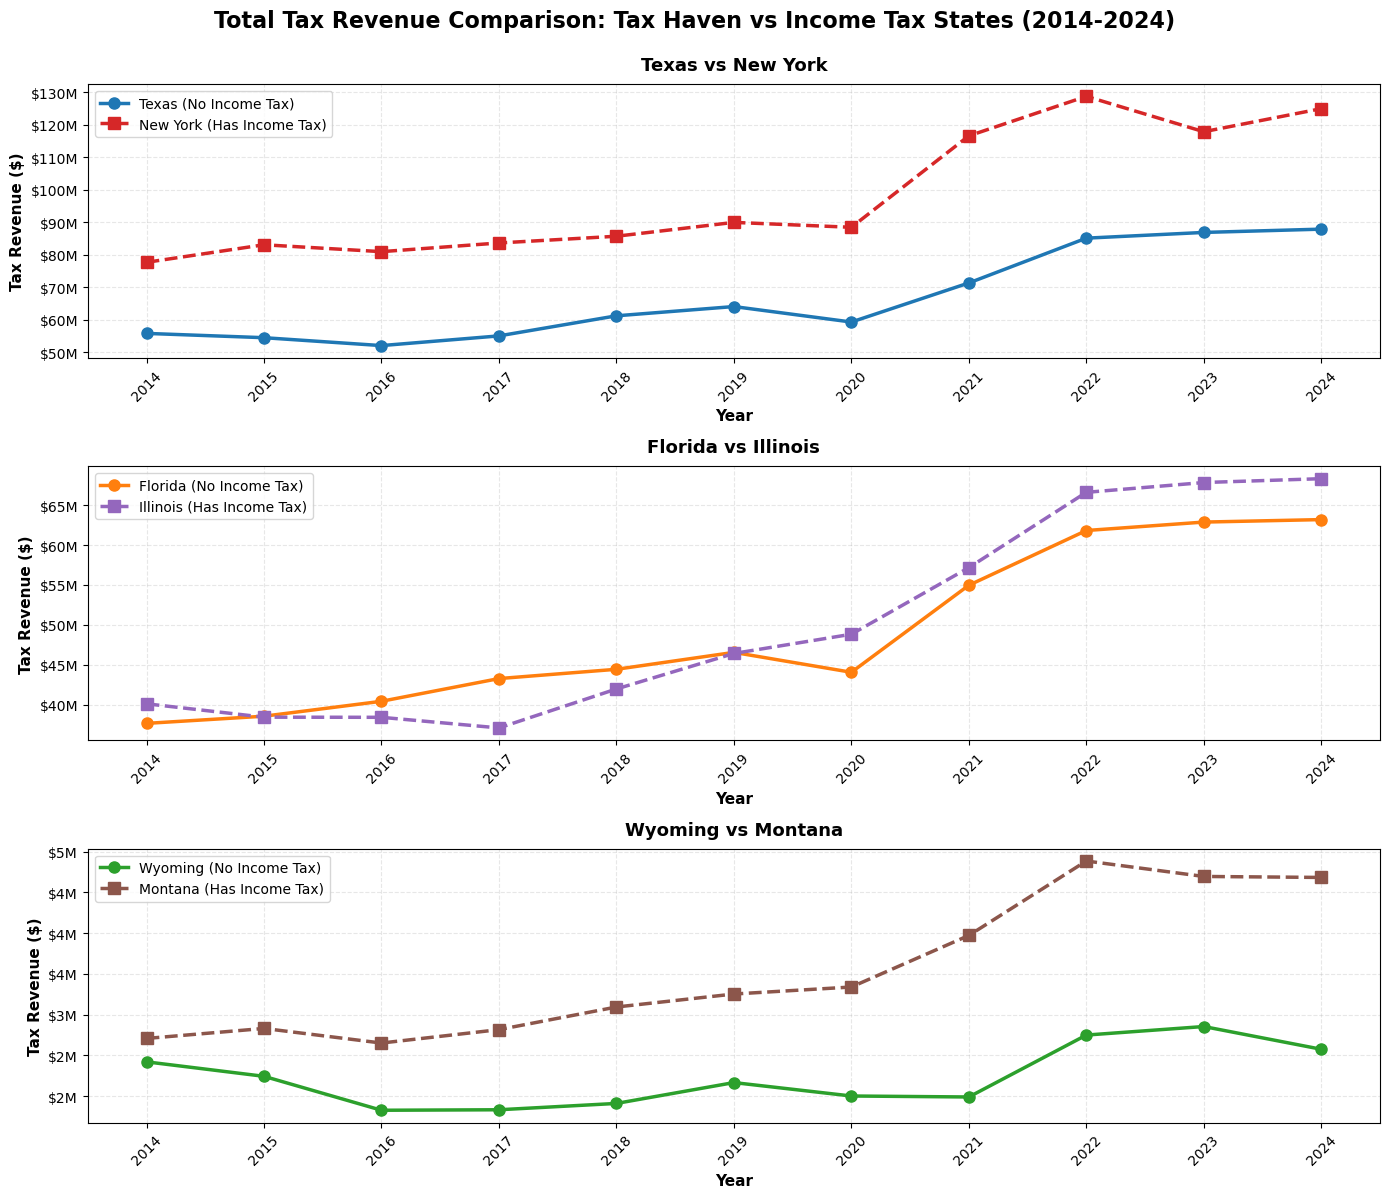

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Total_Tax_Revenue', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/gdp_total_comparison.png'

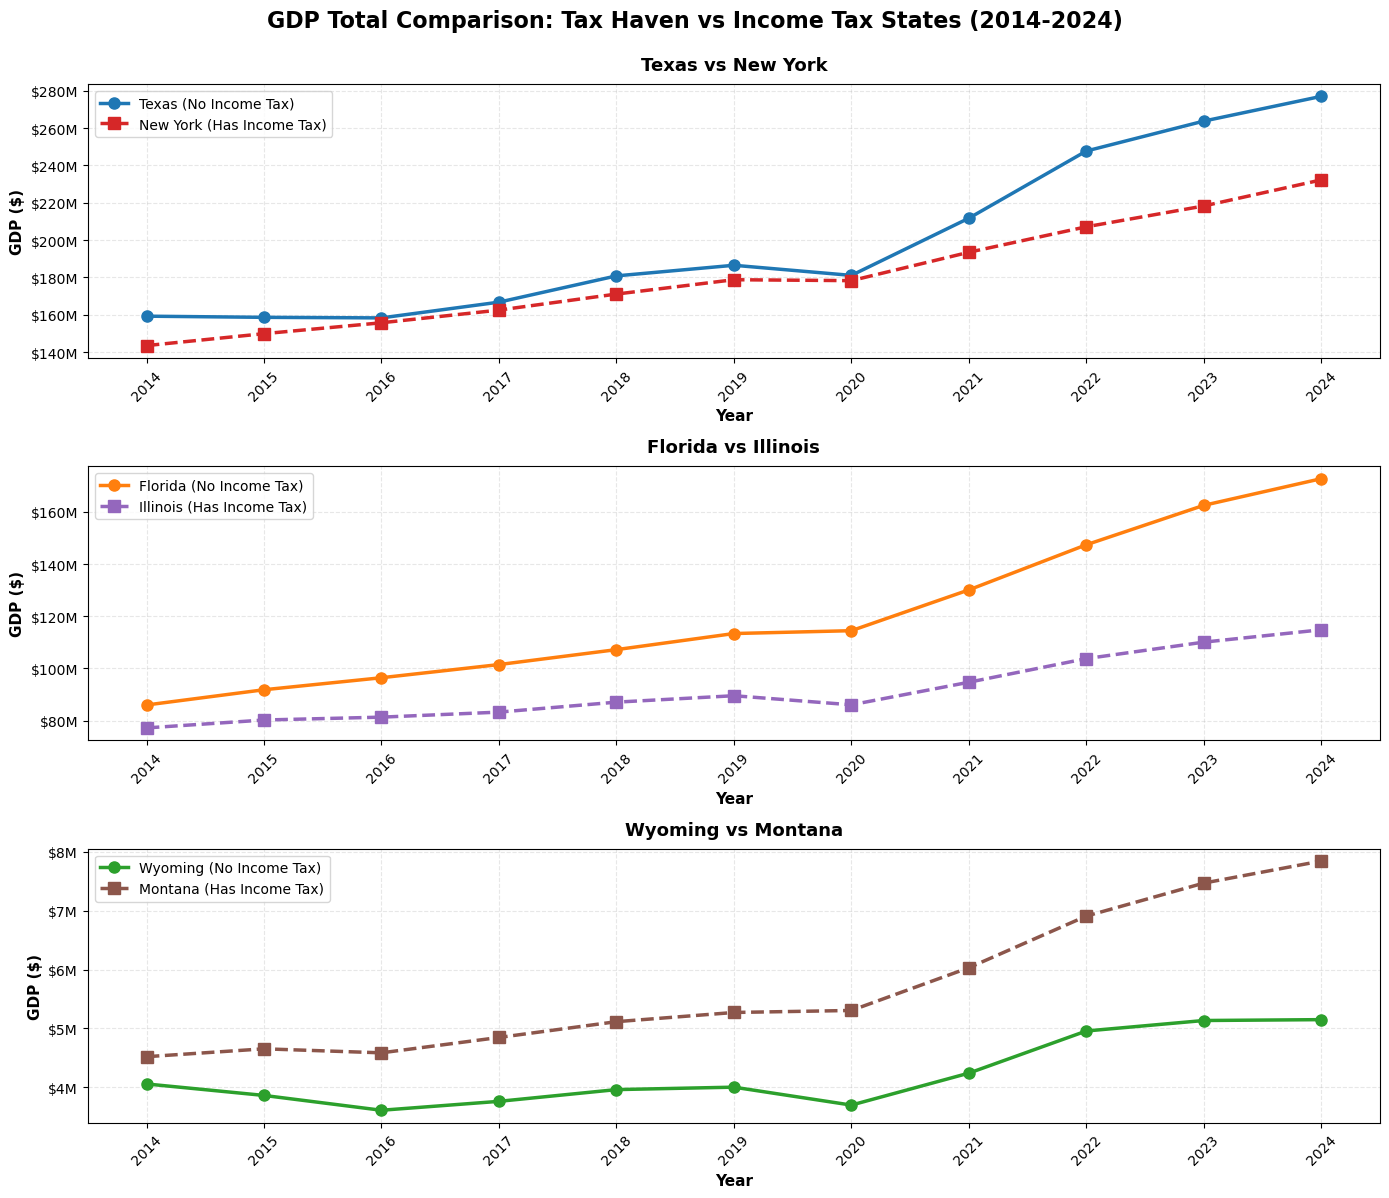

In [ ]:
plot_single_metric(state_merge, state_pairs, 'GDP_Total', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/gdp_per_capita_comparison.png'

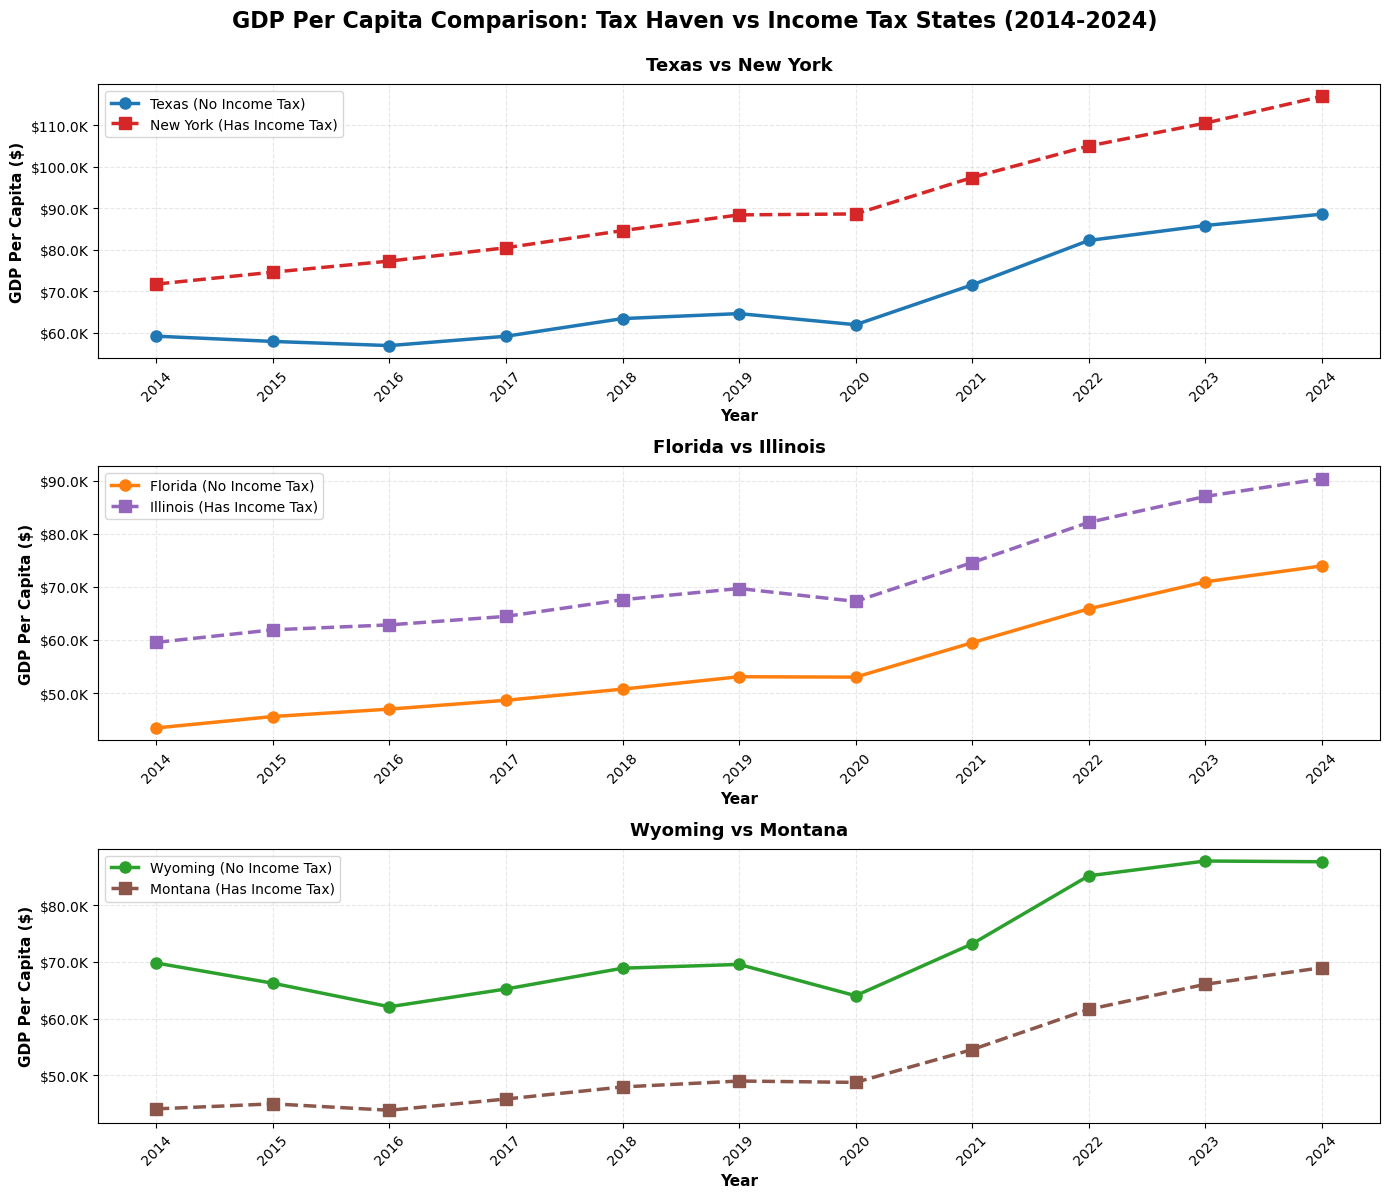

In [ ]:
plot_single_metric(state_merge, state_pairs, 'GDP_Per_Capita', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/unemployment_rate_comparison.png'

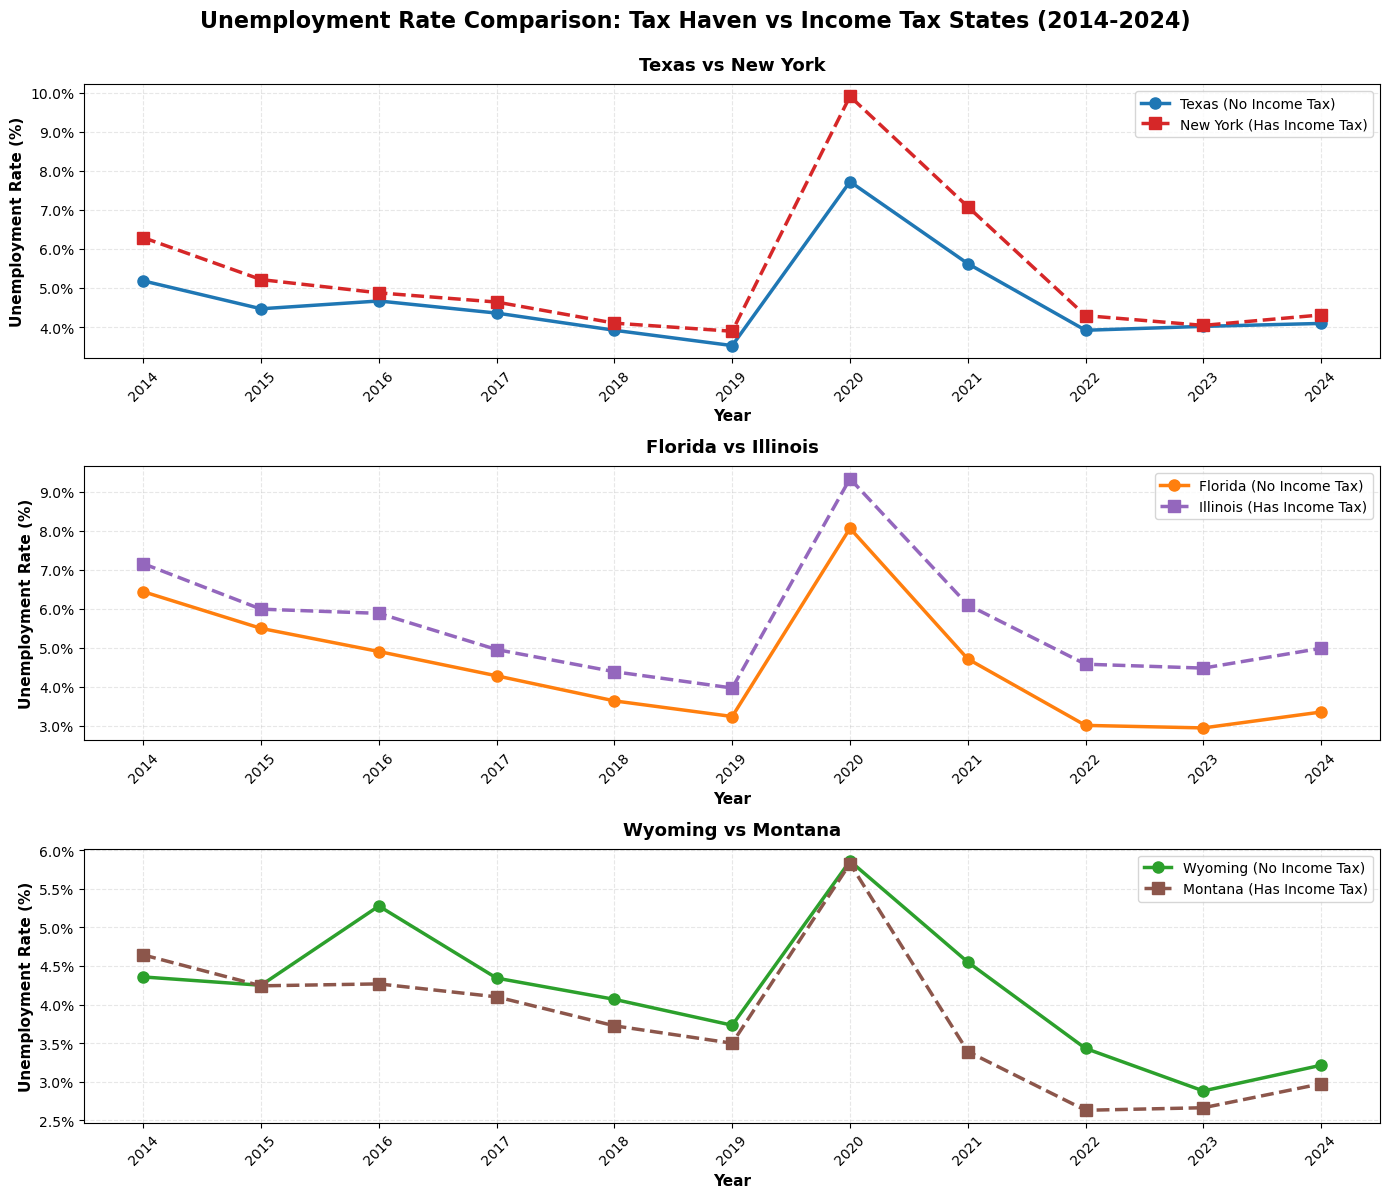

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Unemployment_Rate', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/housing_price_index_comparison.png'

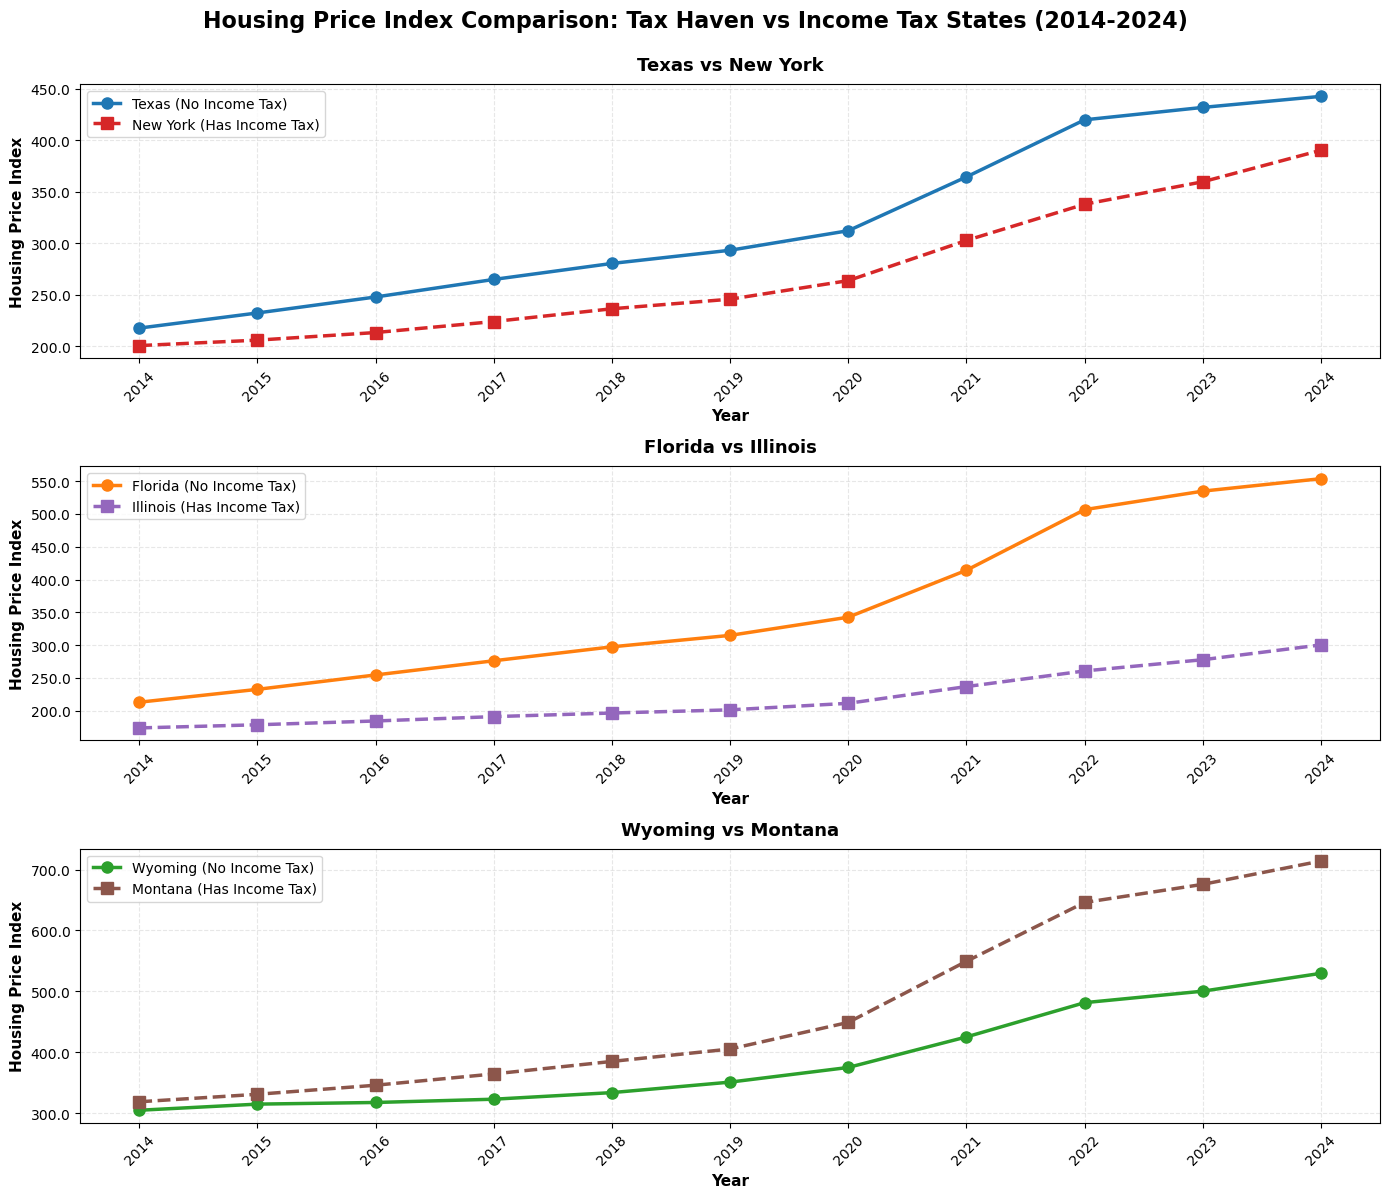

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Housing_Price_Index', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/formations_comparison.png'

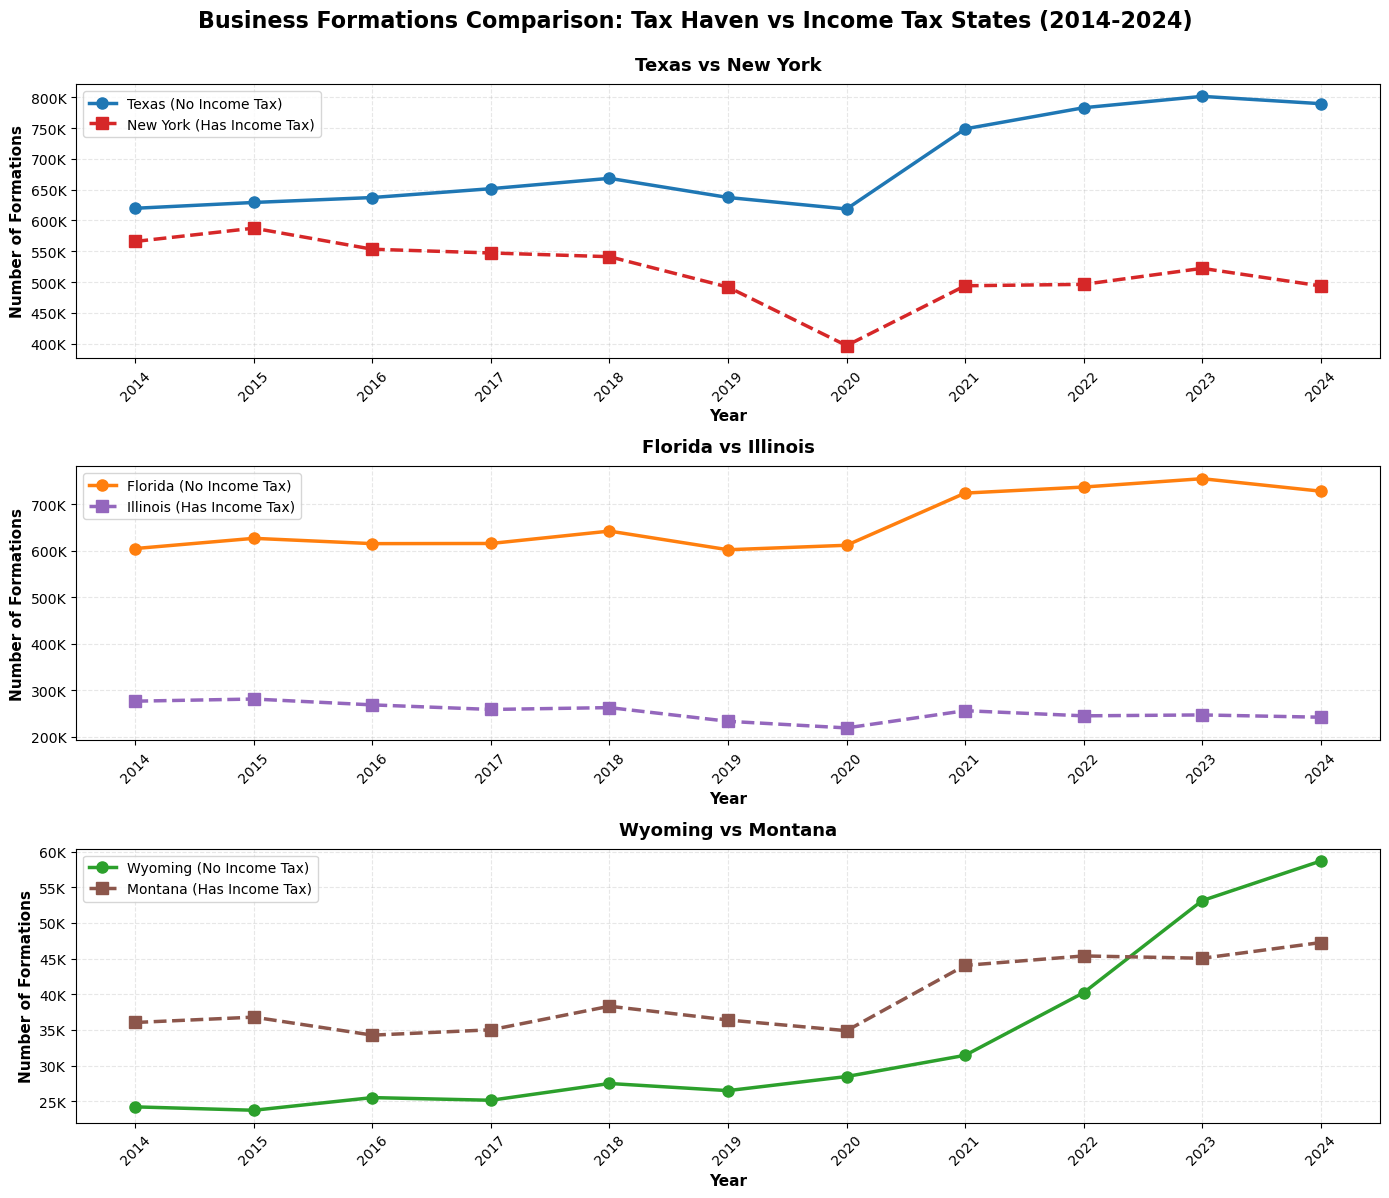

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Formations', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/personal_income_comparison.png'

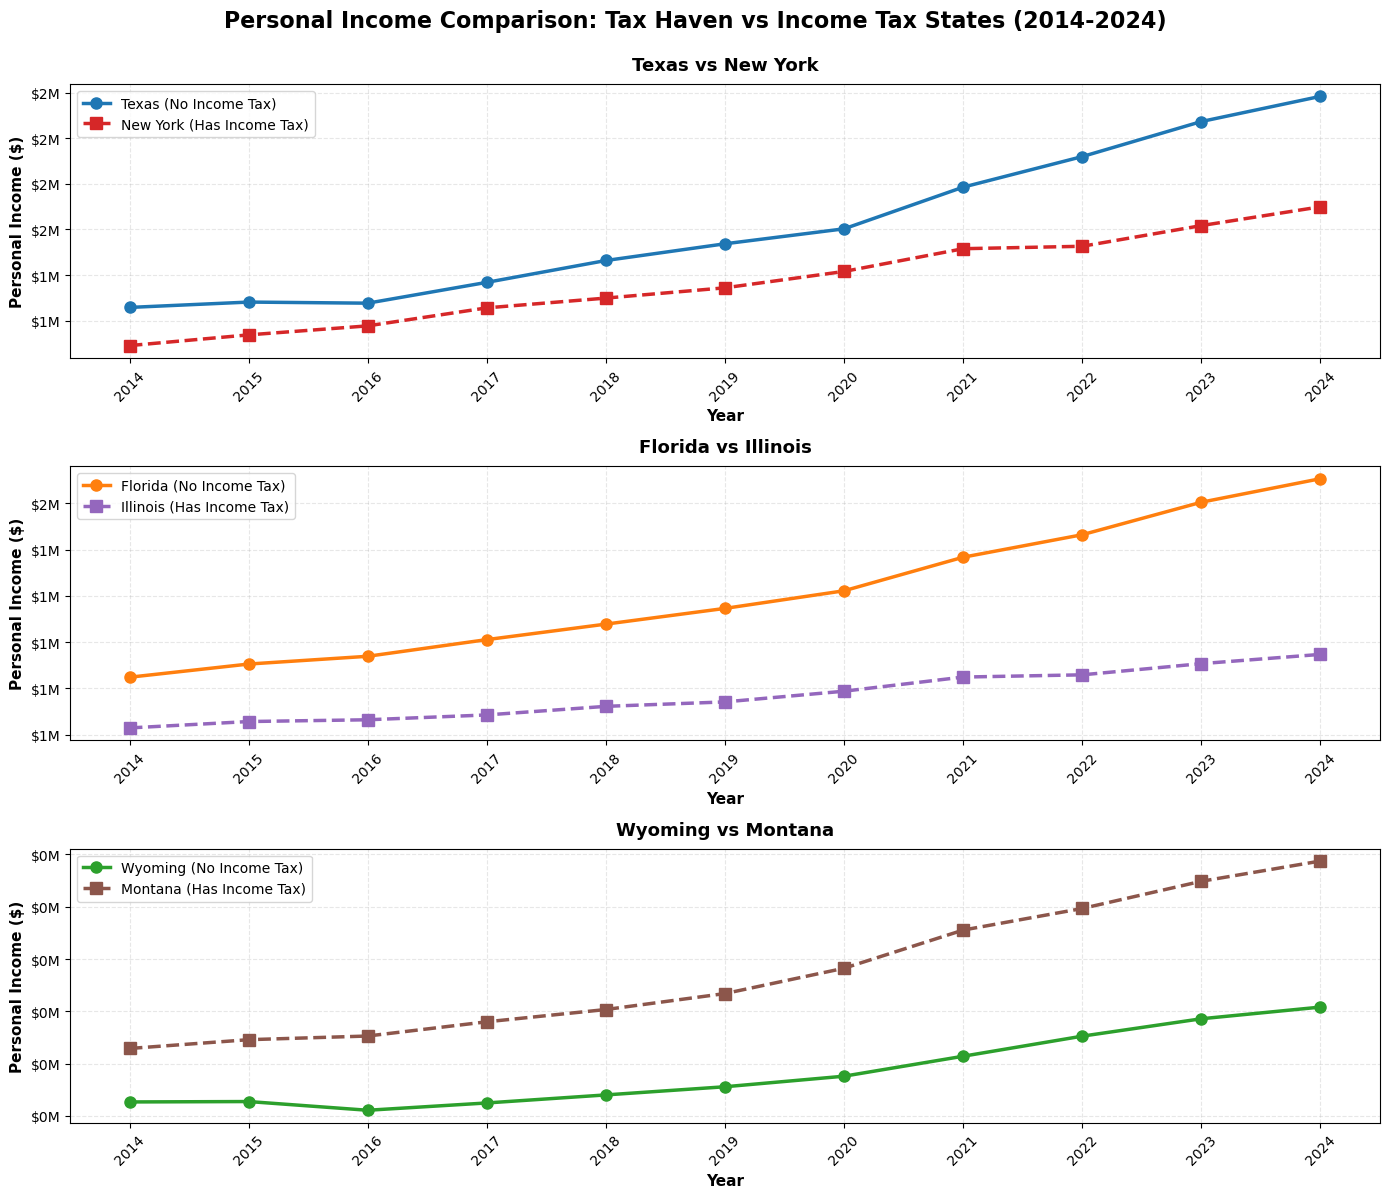

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Personal_Income', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/gdp_per_capita_comparison.png'

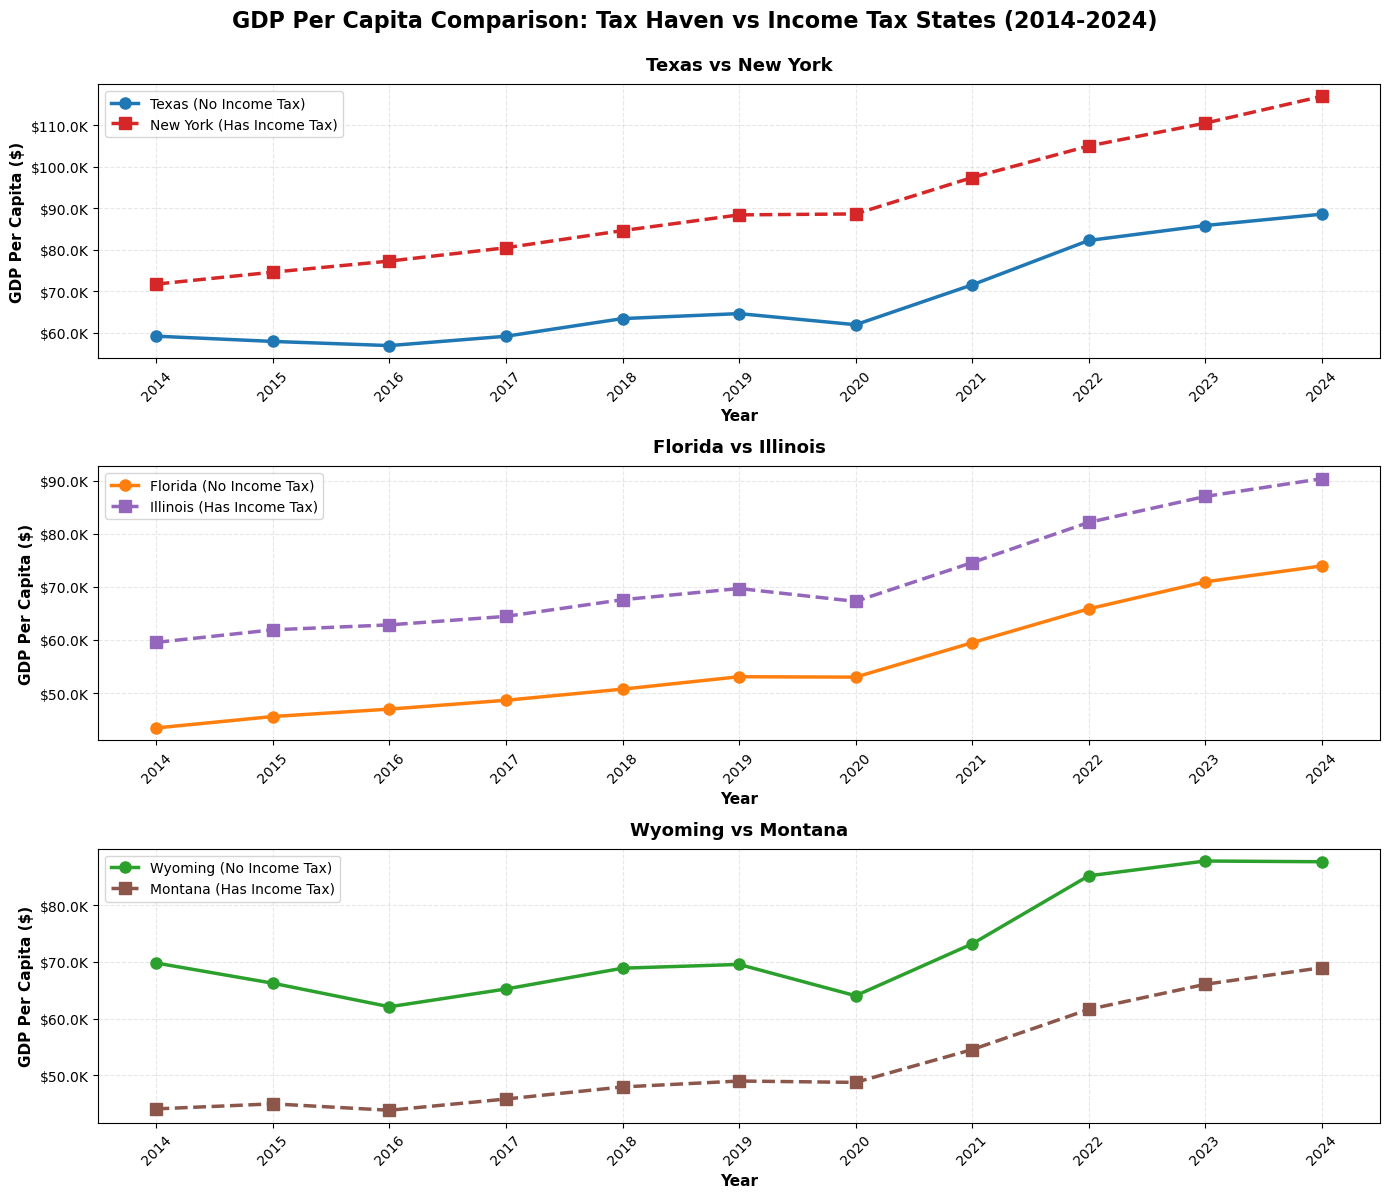

In [ ]:
plot_single_metric(state_merge, state_pairs, 'GDP_Per_Capita', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/unemployment_rate_comparison.png'

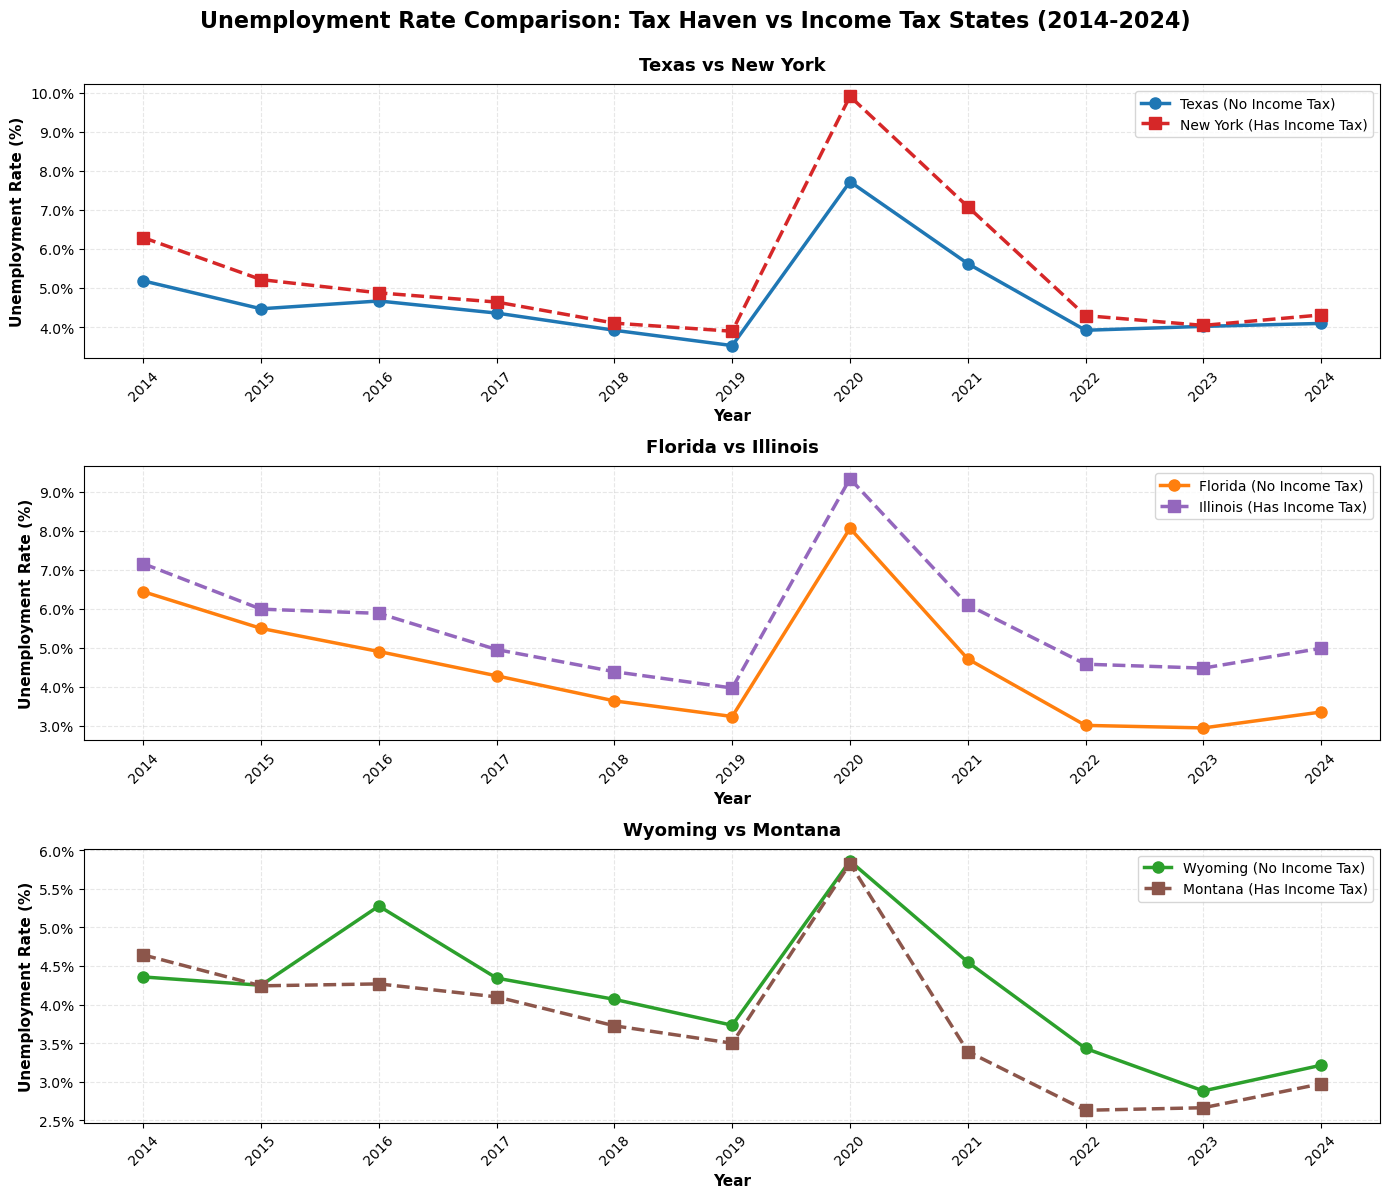

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Unemployment_Rate', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/housing_price_index_comparison.png'

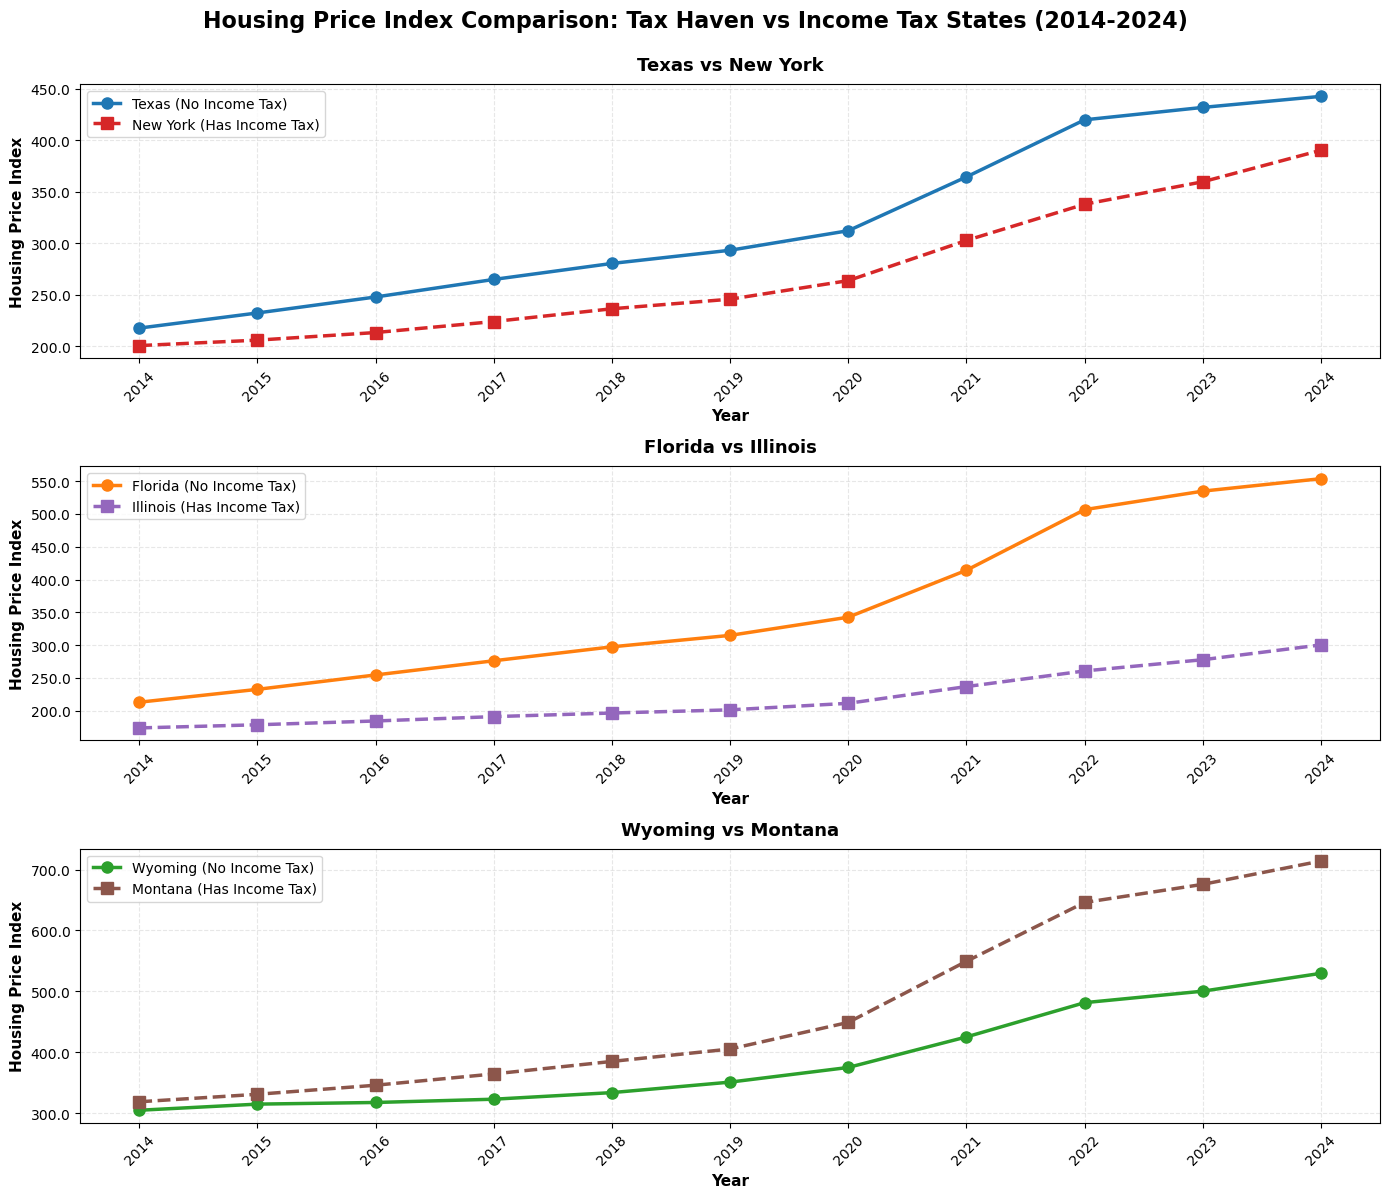

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Housing_Price_Index', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/formations_comparison.png'

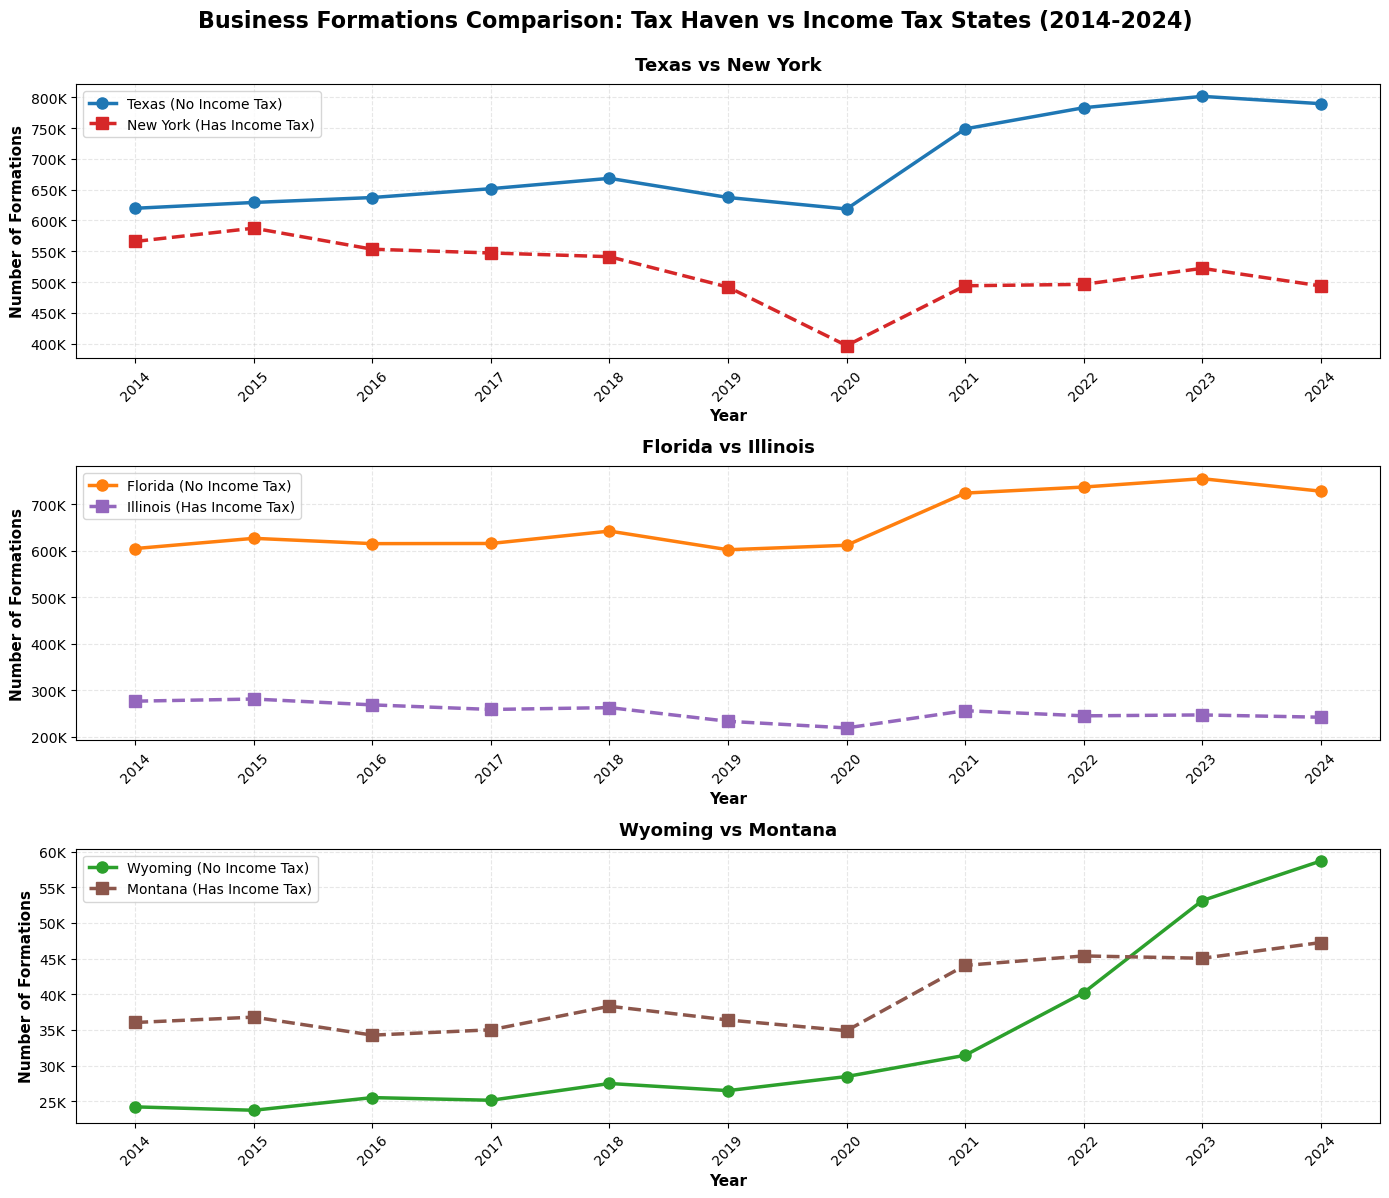

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Formations', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/population_comparison.png'

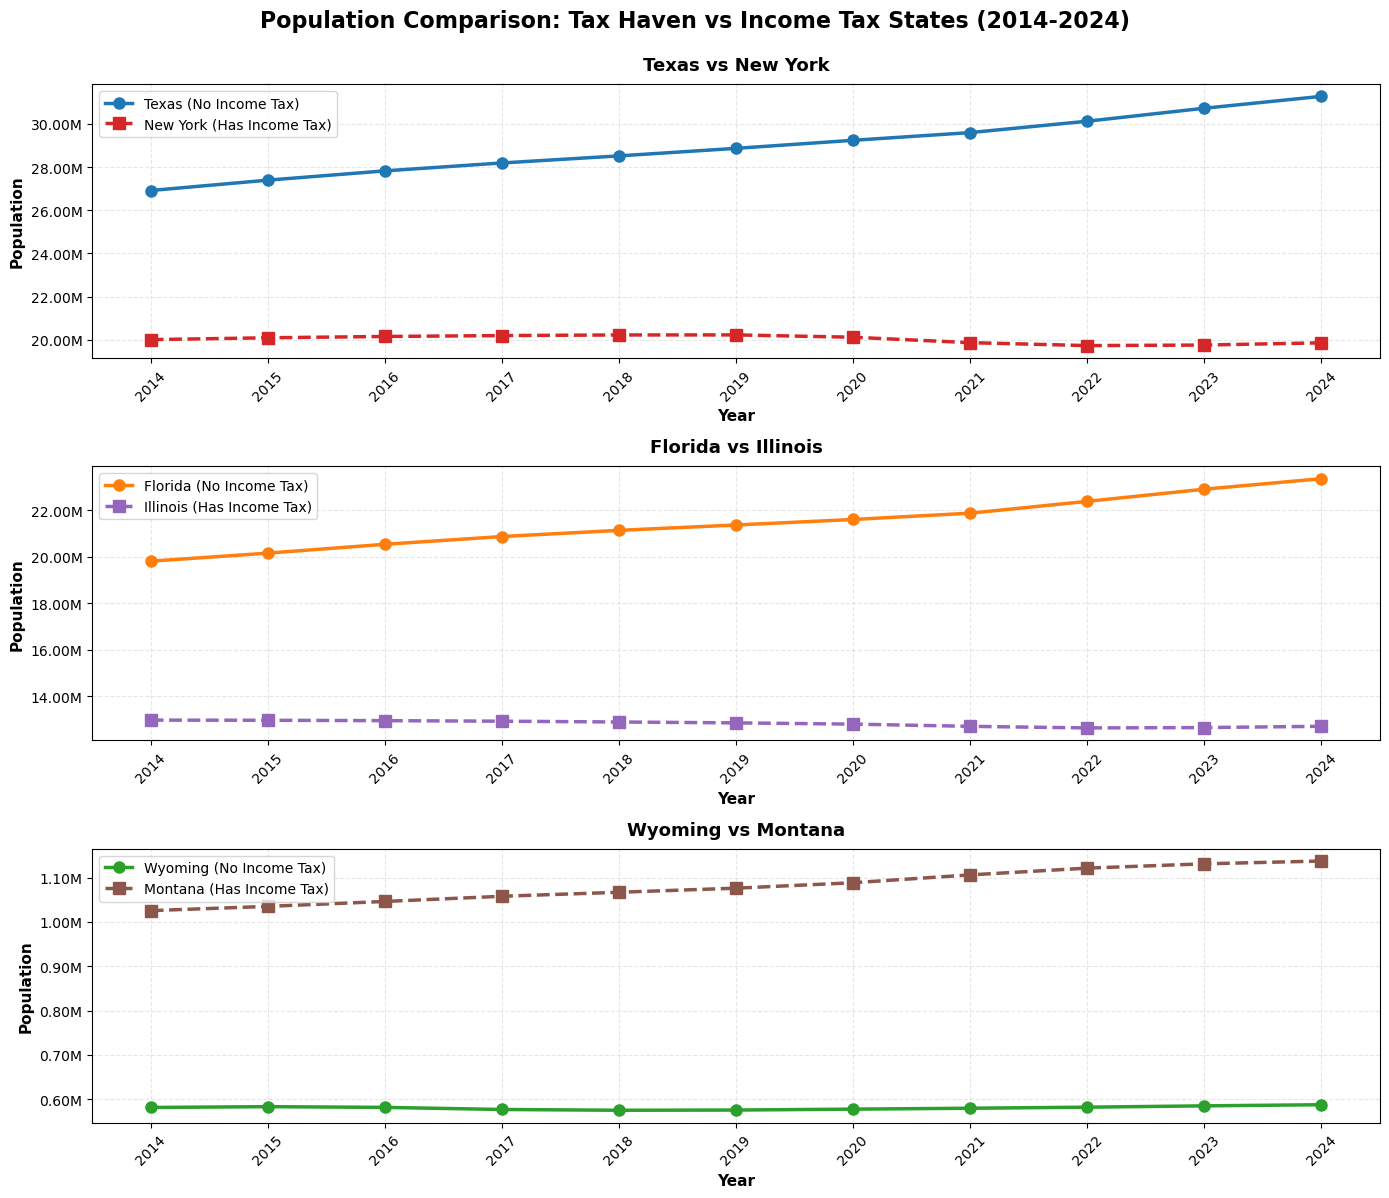

In [ ]:
plot_single_metric(state_merge, state_pairs, 'Population', year_range=(2014, 2024), save_path=None)

In [ ]:
def plot_average_comparison(df, state_pairs, metric_name, year_range=(2014, 2024), save_path=None):
    """
    Create a single plot comparing the AVERAGE of tax haven states vs AVERAGE of non-tax haven states

    Parameters:
    -----------
    df : DataFrame
        The main dataframe
    state_pairs : dict
        Dictionary mapping tax haven states to comparison states
    metric_name : str
        Name of the metric to plot (must be in METRICS dictionary)
    year_range : tuple
        (start_year, end_year)
    save_path : str, optional
        Path to save the figure. If None, uses default naming

    Returns:
    --------
    DataFrame with the averaged metric data
    """
    if metric_name not in METRICS:
        raise ValueError(f"Metric '{metric_name}' not found. Available: {list(METRICS.keys())}")

    metric_config = METRICS[metric_name]

    # Get tax haven and non-tax haven states
    tax_haven_states = list(state_pairs.keys())
    non_tax_haven_states = list(state_pairs.values())

    # Calculate metric for all states
    all_states = tax_haven_states + non_tax_haven_states
    metric_data = calculate_metric_by_year(df, all_states, metric_name, year_range)

    # Calculate averages for each group by year
    haven_avg = metric_data[metric_data['State'].isin(tax_haven_states)].groupby('Year')[metric_name].mean().reset_index()
    haven_avg.columns = ['Year', 'Average']
    haven_avg['Group'] = 'Tax Haven States (Avg)'

    non_haven_avg = metric_data[metric_data['State'].isin(non_tax_haven_states)].groupby('Year')[metric_name].mean().reset_index()
    non_haven_avg.columns = ['Year', 'Average']
    non_haven_avg['Group'] = 'Income Tax States (Avg)'

    # Combine for return
    combined_data = pd.concat([haven_avg, non_haven_avg], ignore_index=True)

    # Create single plot
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))

    # Plot lines
    ax.plot(haven_avg['Year'], haven_avg['Average'],
            marker='o', linewidth=3, markersize=10,
            label=f'Tax Haven States Average\n({", ".join(tax_haven_states)})',
            color='#1f77b4', alpha=0.8)

    ax.plot(non_haven_avg['Year'], non_haven_avg['Average'],
            marker='s', linewidth=3, markersize=10,
            label=f'Income Tax States Average\n({", ".join(non_tax_haven_states)})',
            color='#d62728', linestyle='--', alpha=0.8)

    # Formatting
    ax.set_xlabel('Year', fontsize=13, fontweight='bold')
    ax.set_ylabel(metric_config['ylabel'], fontsize=13, fontweight='bold')
    ax.set_title(f'{metric_config["title"]} Comparison: Average of Tax Haven vs Income Tax States ({year_range[0]}-{year_range[1]})',
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.ticklabel_format(style='plain', axis='y')

    # Format y-axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(metric_config['format']))

    # Set x-axis to show all years
    ax.set_xticks(range(year_range[0], year_range[1] + 1))
    ax.set_xticklabels(range(year_range[0], year_range[1] + 1), rotation=45)

    plt.tight_layout()

    # Save figure
    if save_path is None:
        save_path = f'/home/claude/{metric_name.lower()}_average_comparison.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Average comparison plot saved as '{save_path}'")
    plt.close()

    return combined_data

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/total_tax_revenue_average_comparison.png'

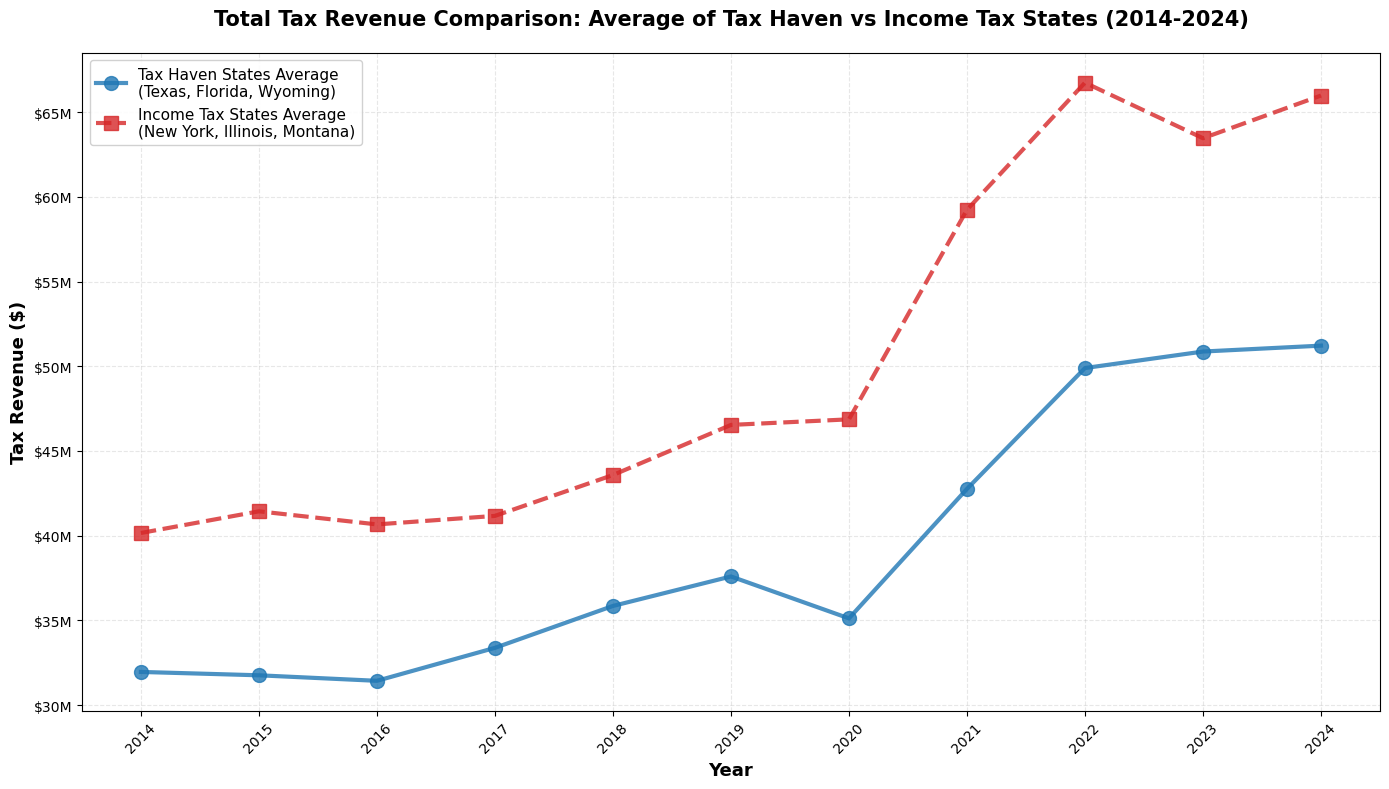

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Total_Tax_Revenue', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/gdp_total_average_comparison.png'

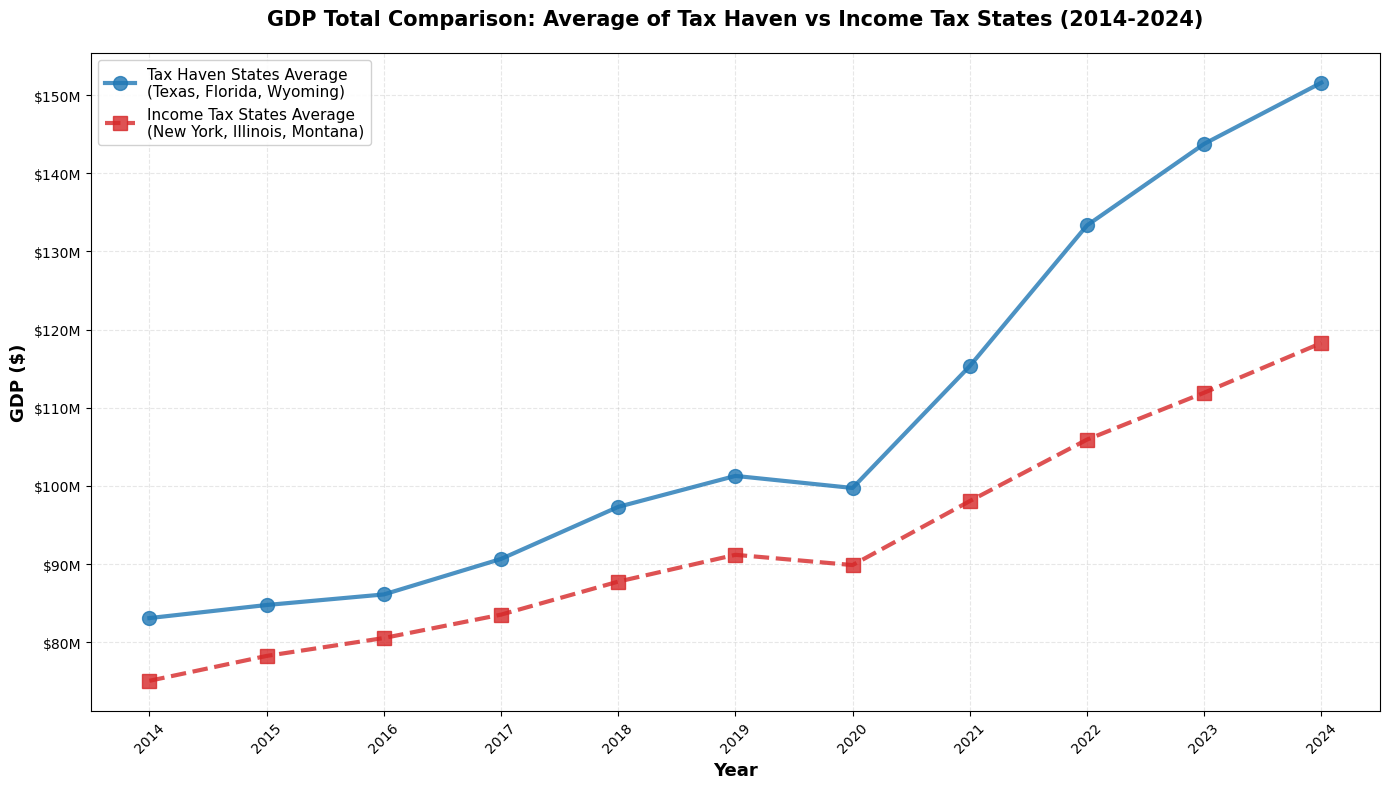

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'GDP_Total', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/gdp_per_capita_average_comparison.png'

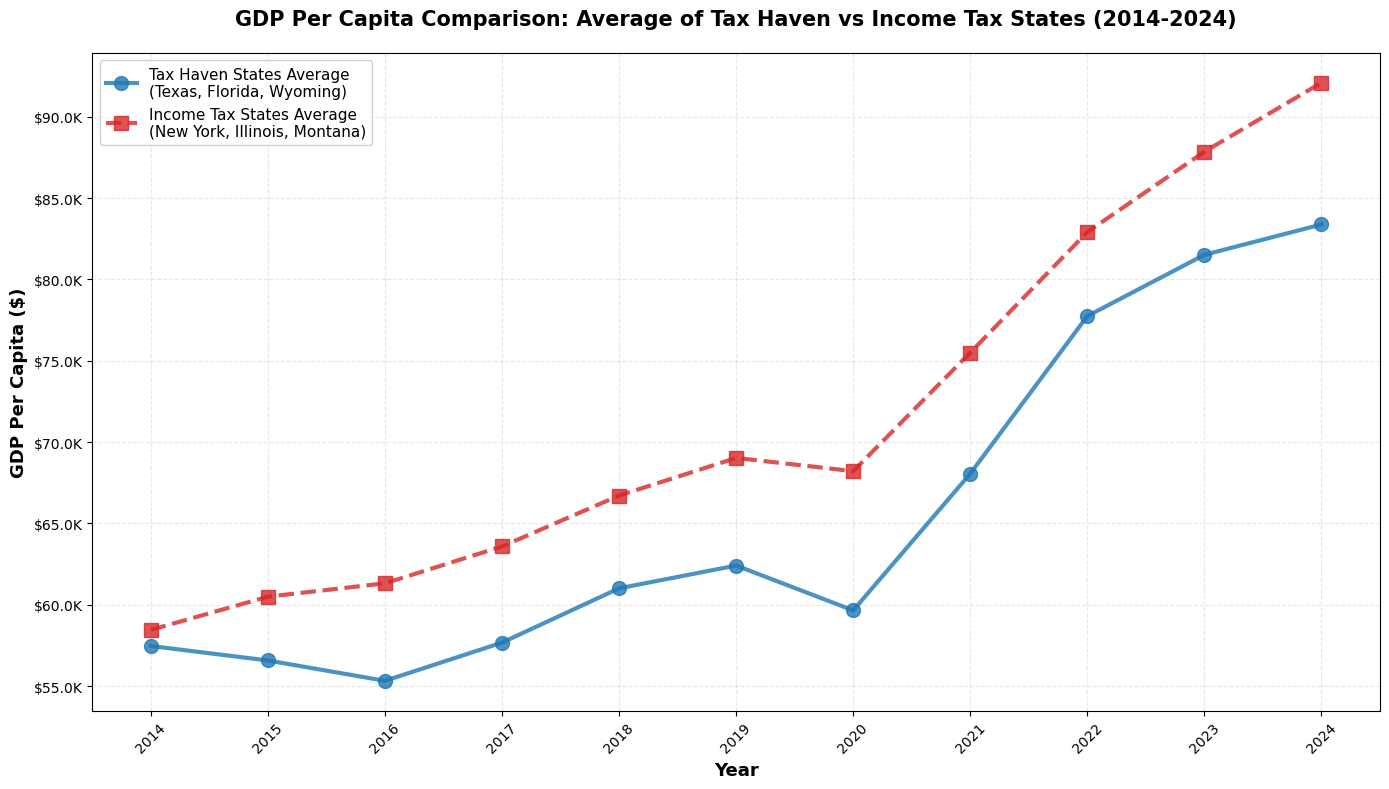

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'GDP_Per_Capita', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/unemployment_rate_average_comparison.png'

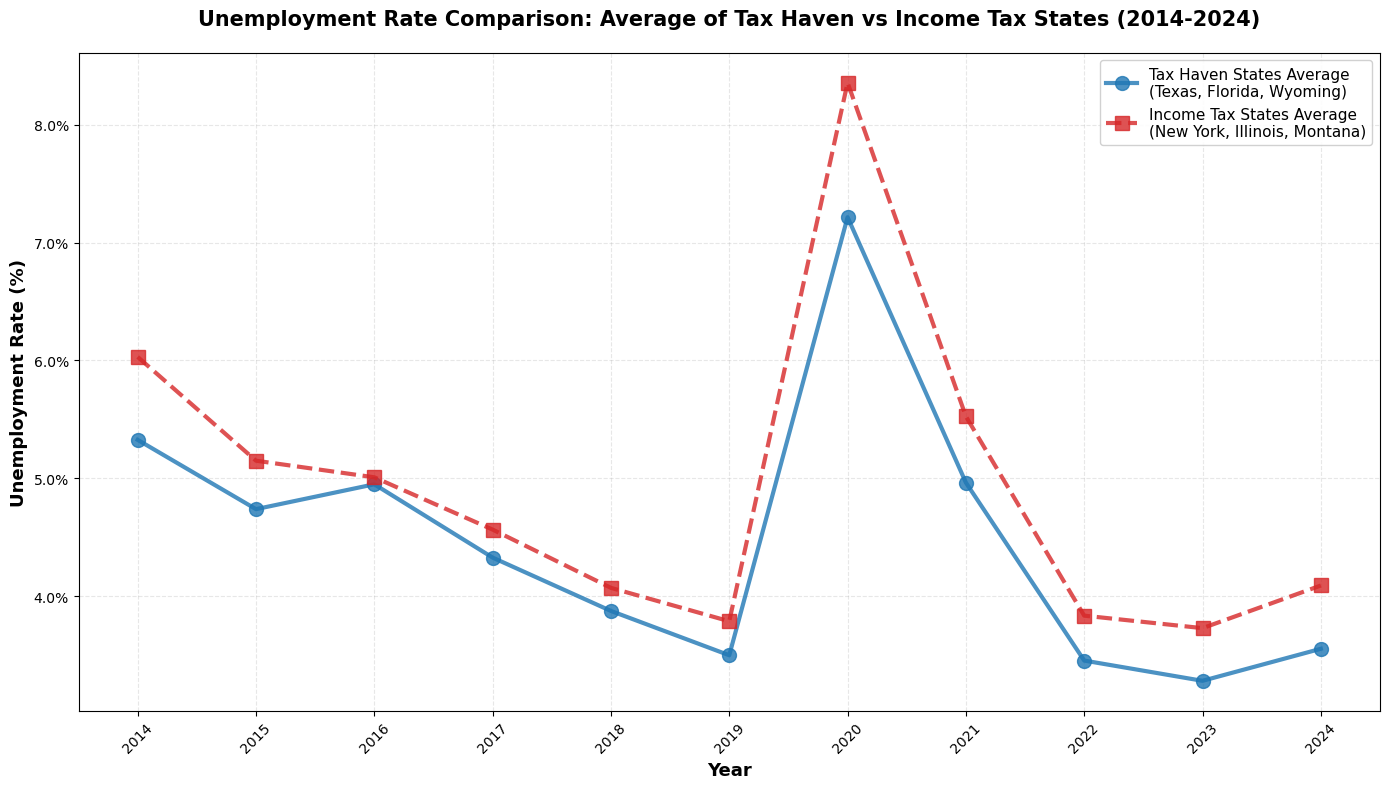

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Unemployment_Rate', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/personal_income_average_comparison.png'

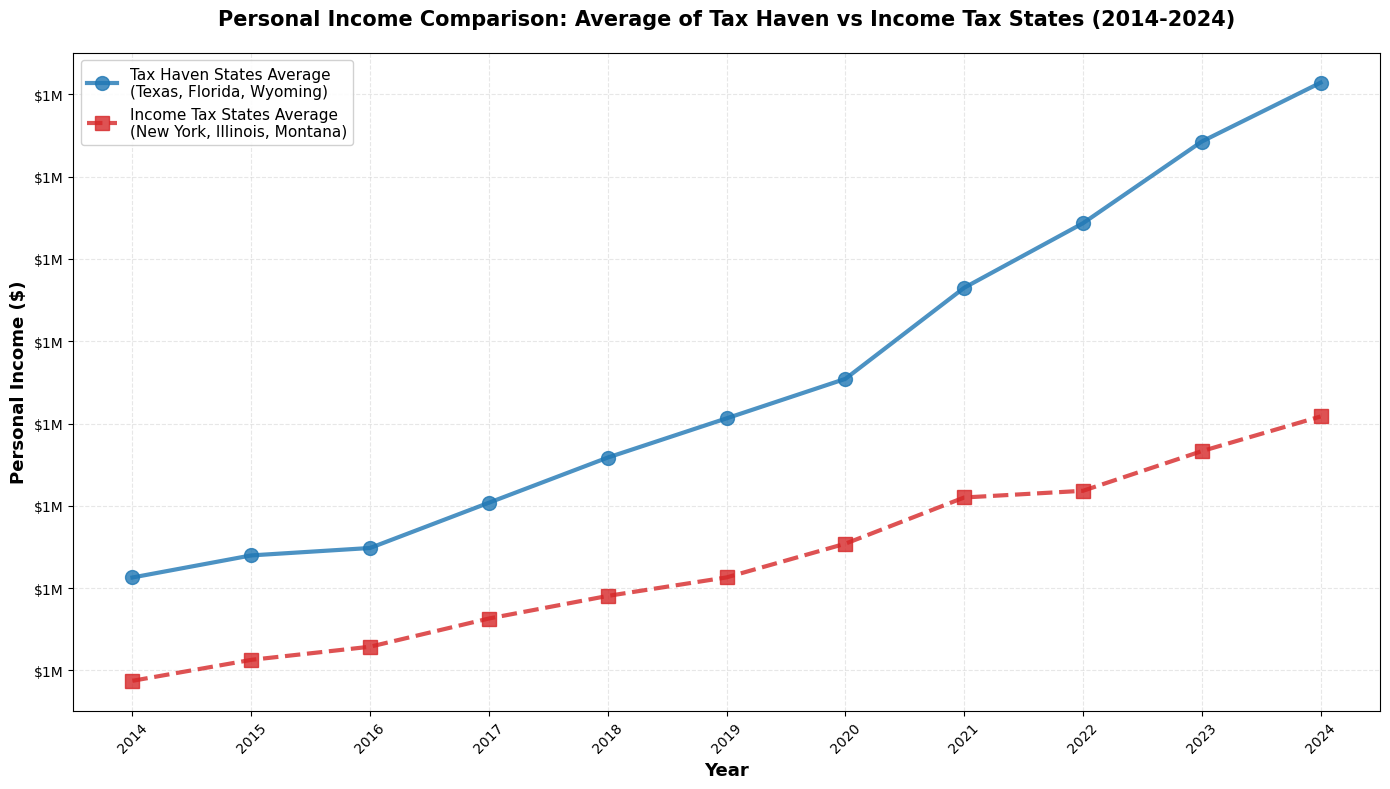

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Personal_Income', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/housing_price_index_average_comparison.png'

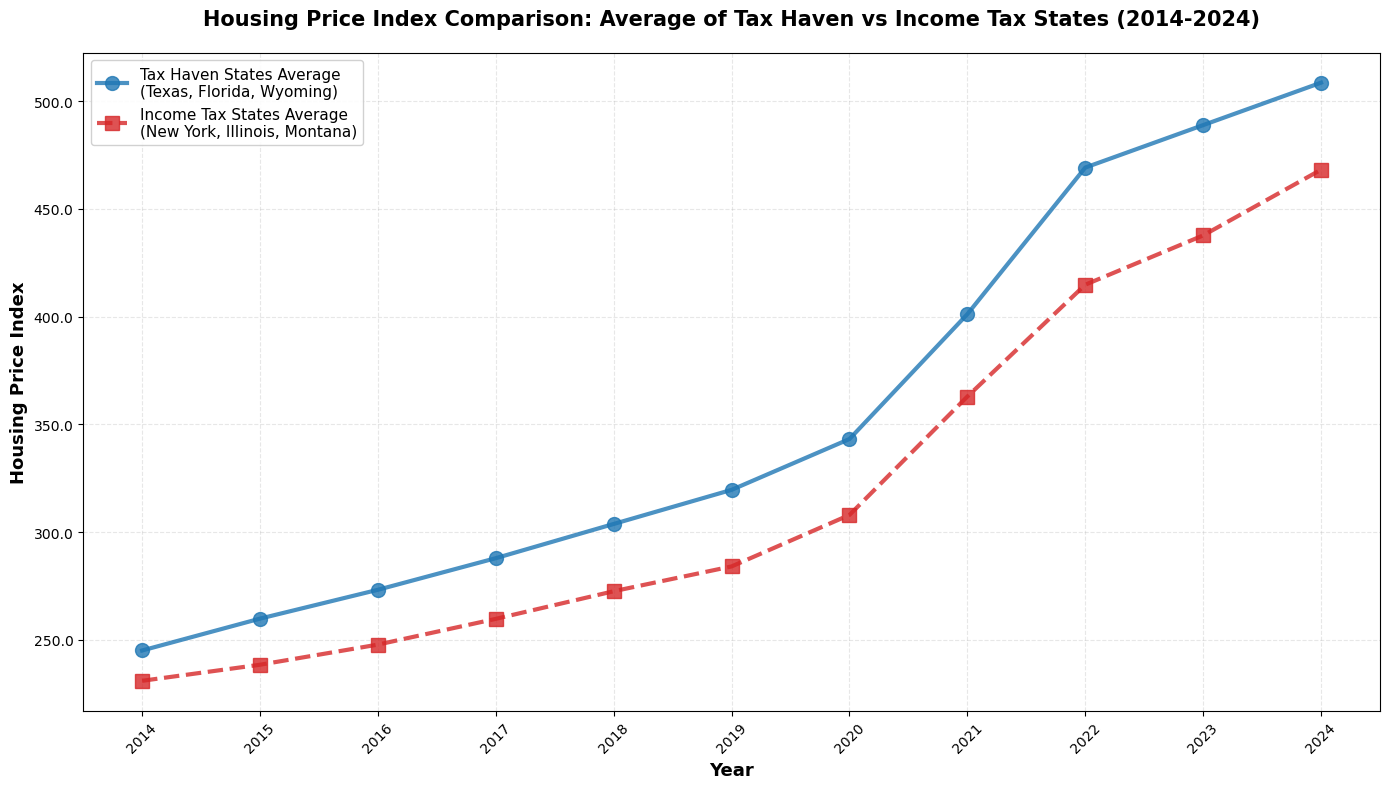

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Housing_Price_Index', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/formations_average_comparison.png'

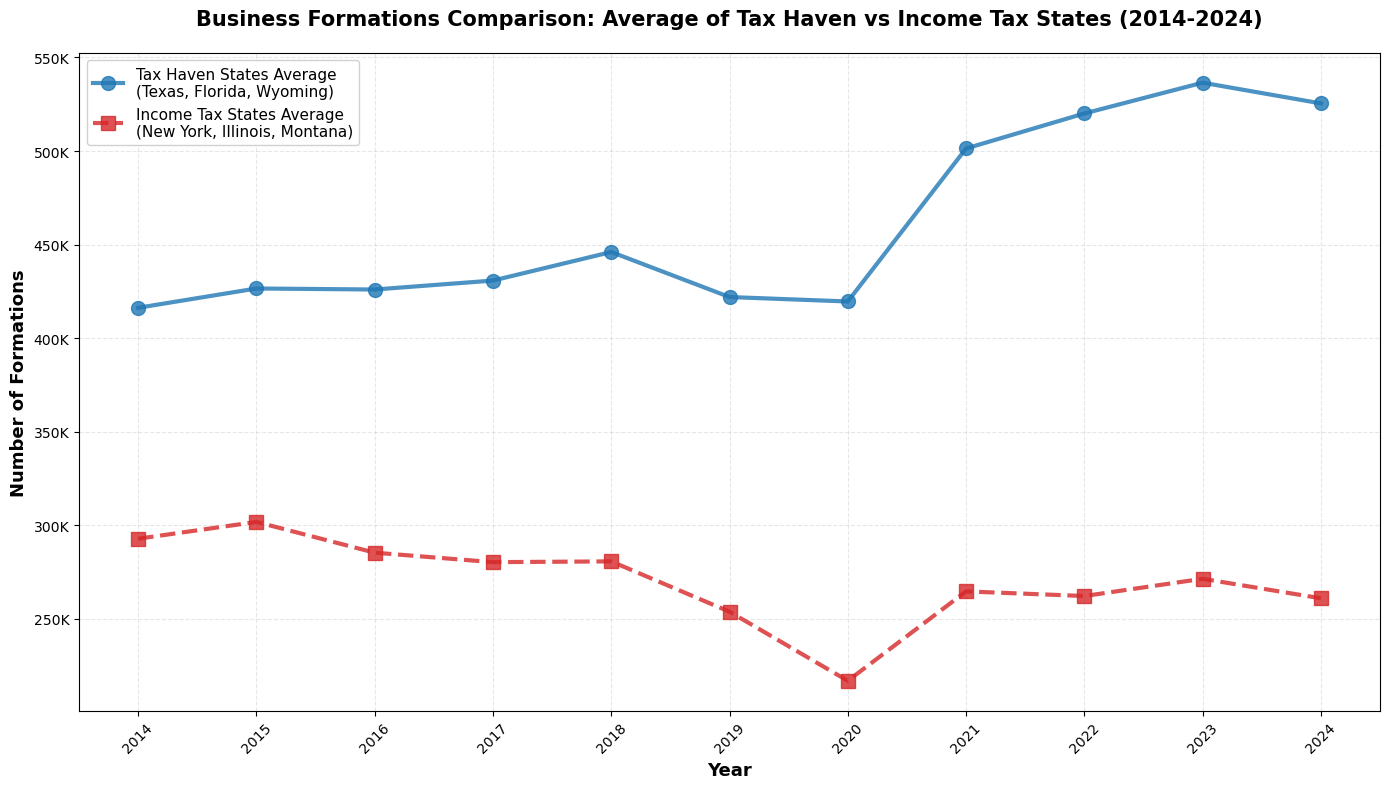

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Formations', year_range=(2014, 2024), save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/claude/population_average_comparison.png'

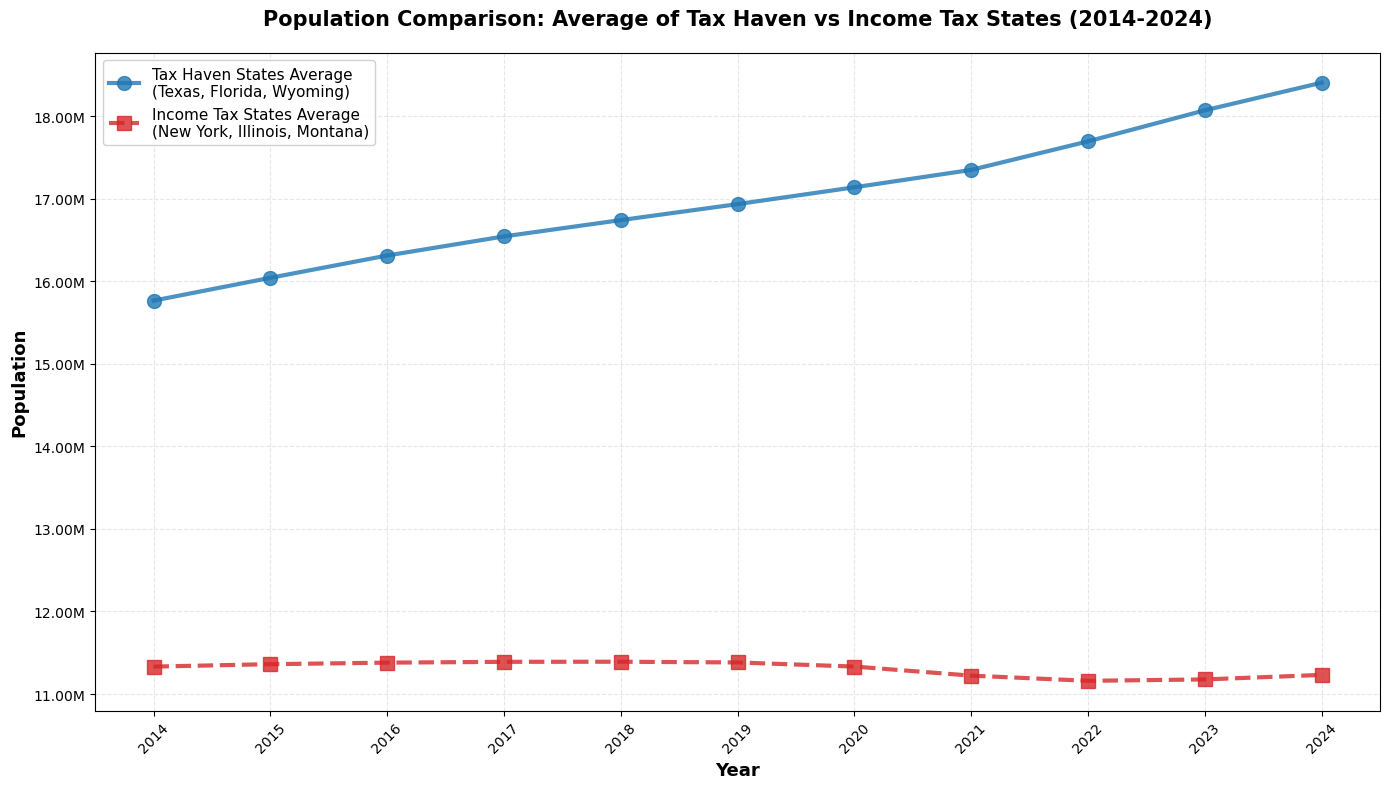

In [ ]:
plot_average_comparison(state_merge, state_pairs, 'Population', year_range=(2014, 2024), save_path=None)

In [ ]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# States with no income tax (as of recent years)
NO_INCOME_TAX_STATES = [
    'Alaska', 'Florida', 'Nevada', 'South Dakota',
    'Tennessee', 'Texas', 'Washington', 'Wyoming'
]

In [ ]:
# Step 0: Create tax status indicator
state_merge['Has_Income_Tax'] = ~state_merge['State'].isin(NO_INCOME_TAX_STATES)
state_merge['Tax_Status'] = state_merge['Has_Income_Tax'].map({True: 'Income Tax', False: 'No Income Tax'})

# Calculate GDP per capita
state_merge['GDP_Per_Capita'] = state_merge['GDP_Total'] / state_merge['Population']

In [ ]:
# Step 1: Normalize everything to 2014 = 100
def index_to_base_year(group, columns, base_year=2014):
    """
    Index values to base_year = 100 for each state
    """
    # Get base year values
    base_values = group[group['Year'] == base_year][columns].iloc[0]

    # Index all values
    for col in columns:
        group[f'{col}_Indexed'] = (group[col] / base_values[col]) * 100

    return group

# Columns to index
columns_to_index = ['GDP_Total', 'Population', 'GDP_Per_Capita', 'Housing_Price_Index']

# Apply indexing by state
df_indexed = state_merge.groupby('State', group_keys=False).apply(
    lambda x: index_to_base_year(x, columns_to_index, base_year=2014)
)

# Filter to annual data (Q4 only for cleaner visualization)
df_annual = df_indexed[df_indexed['Quarter'] == 4].copy()

# Calculate year-over-year changes
df_annual = df_annual.sort_values(['State', 'Year'])
for col in columns_to_index:
    indexed_col = f'{col}_Indexed'
    df_annual[f'{col}_Change'] = df_annual.groupby('State')[indexed_col].diff()

print("States with no income tax:")
print(df_annual[df_annual['Tax_Status'] == 'No Income Tax']['State'].unique())
print(f"\nNumber of no-income-tax states: {df_annual[df_annual['Tax_Status'] == 'No Income Tax']['State'].nunique()}")
print(f"Number of income-tax states: {df_annual[df_annual['Tax_Status'] == 'Income Tax']['State'].nunique()}")

States with no income tax:
['Alaska' 'Florida' 'Nevada' 'South Dakota' 'Tennessee' 'Texas'
 'Washington' 'Wyoming']

Number of no-income-tax states: 8
Number of income-tax states: 44


/var/folders/4j/zbynf7z51vjd7srq3yt48vpm0000gn/T/ipykernel_846/3401375598.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_indexed = state_merge.groupby('State', group_keys=False).apply(


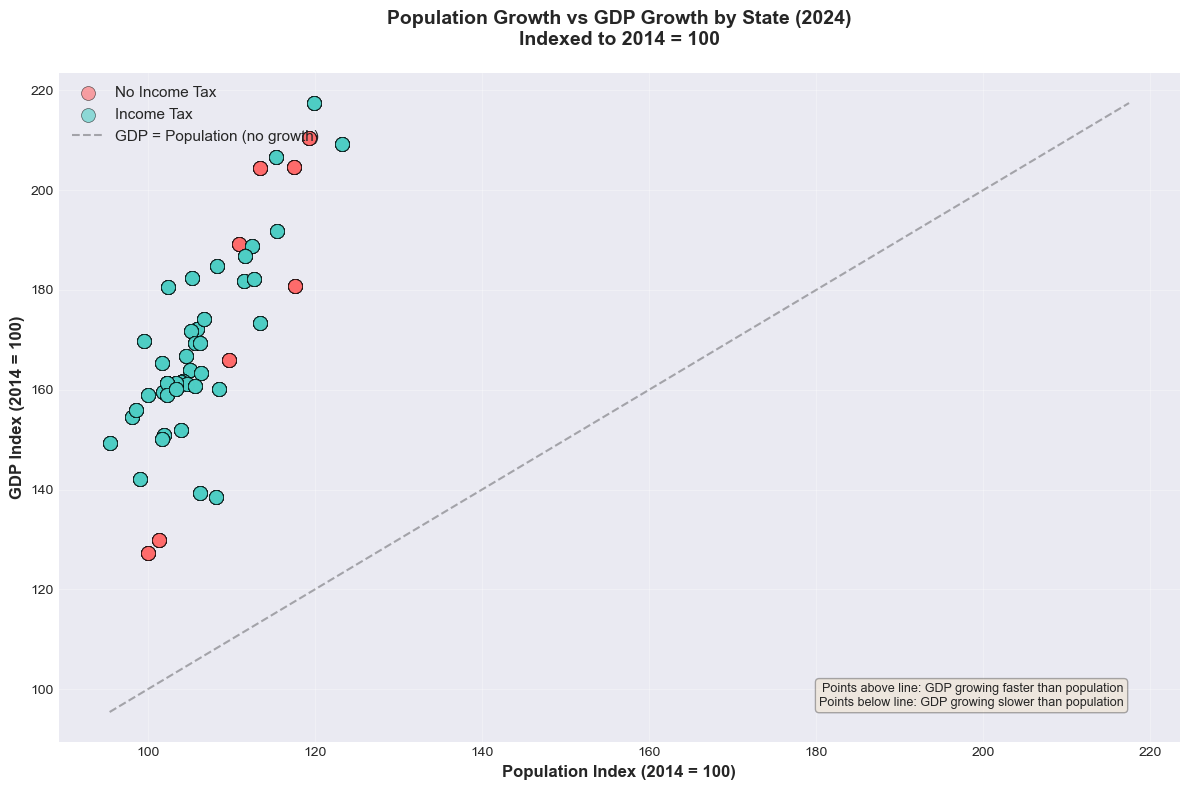

In [ ]:
# Step 2: Create visualizations

# SLIDE 1: Population vs GDP (Indexed)
fig1, ax1 = plt.subplots(figsize=(12, 8))

# Filter to a specific year for cleaner visualization (e.g., 2023)
year_to_plot = df_annual['Year'].max()
df_plot = df_annual[df_annual['Year'] == year_to_plot].copy()

# Create scatter plot
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    ax1.scatter(
        df_plot[mask]['Population_Indexed'],
        df_plot[mask]['GDP_Total_Indexed'],
        label=tax_status,
        alpha=0.6,
        s=100,
        color=color,
        edgecolors='black',
        linewidth=0.5
    )

# Add diagonal reference line (y=x)
min_val = min(df_plot['Population_Indexed'].min(), df_plot['GDP_Total_Indexed'].min())
max_val = max(df_plot['Population_Indexed'].max(), df_plot['GDP_Total_Indexed'].max())
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, label='GDP = Population (no growth)')

ax1.set_xlabel('Population Index (2014 = 100)', fontsize=12, fontweight='bold')
ax1.set_ylabel('GDP Index (2014 = 100)', fontsize=12, fontweight='bold')
ax1.set_title(f'Population Growth vs GDP Growth by State ({year_to_plot})\nIndexed to 2014 = 100',
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Add annotation
ax1.text(0.95, 0.05,
         'Points above line: GDP growing faster than population\nPoints below line: GDP growing slower than population',
         transform=ax1.transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('slide1_population_vs_gdp.png', dpi=300, bbox_inches='tight')
plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

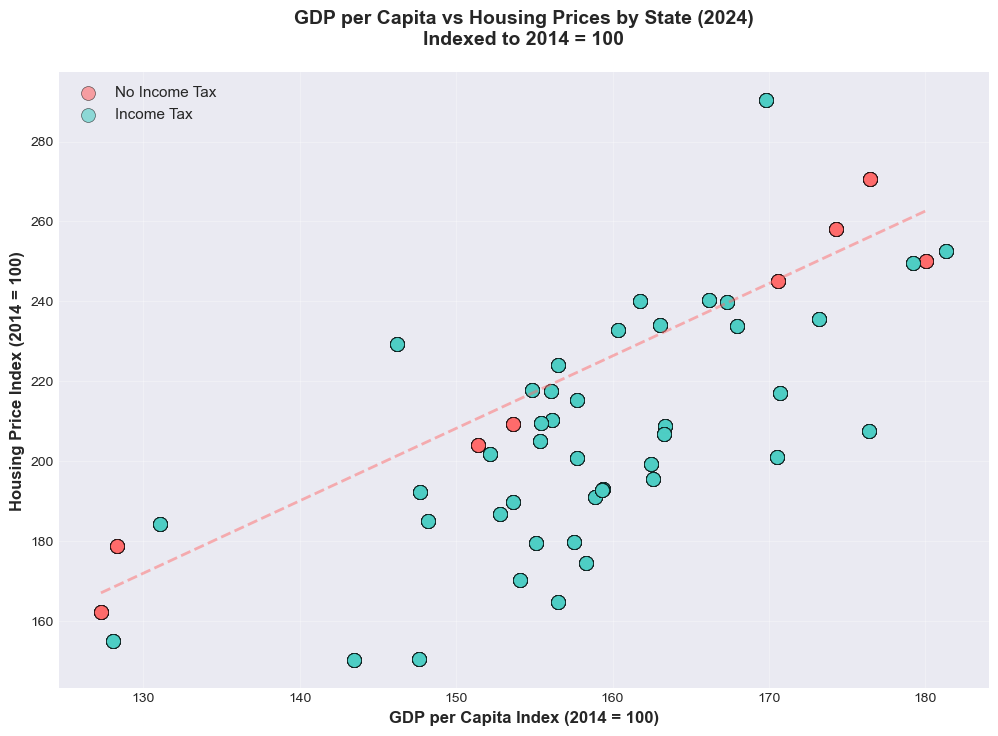

In [ ]:
# SLIDE 2: GDP per Capita vs HPI (Indexed)
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Create scatter plot
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    ax2.scatter(
        df_plot[mask]['GDP_Per_Capita_Indexed'],
        df_plot[mask]['Housing_Price_Index_Indexed'],
        label=tax_status,
        alpha=0.6,
        s=100,
        color=color,
        edgecolors='black',
        linewidth=0.5
    )

ax2.set_xlabel('GDP per Capita Index (2014 = 100)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Housing Price Index (2014 = 100)', fontsize=12, fontweight='bold')
ax2.set_title(f'GDP per Capita vs Housing Prices by State ({year_to_plot})\nIndexed to 2014 = 100',
              fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add trendlines
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    x = df_plot[mask]['GDP_Per_Capita_Indexed'].values
    y = df_plot[mask]['Housing_Price_Index_Indexed'].values

    # Fit line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Plot trendline
    x_line = np.linspace(x.min(), x.max(), 100)
    ax2.plot(x_line, p(x_line), '--', color=color, alpha=0.5, linewidth=2,
             label=f'{tax_status} trend')

ax2.legend(loc='upper left', fontsize=10)

# Add annotation about the tradeoff
ax2.text(0.95, 0.05,
         'Tradeoff visualization:\nHigher GDP per capita often correlates with higher housing prices',
         transform=ax2.transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('slide2_gdp_per_capita_vs_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

# BONUS: Time series comparison
fig3, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = [
    ('GDP_Total_Indexed', 'GDP Index'),
    ('Population_Indexed', 'Population Index'),
    ('GDP_Per_Capita_Indexed', 'GDP per Capita Index'),
    ('Housing_Price_Index_Indexed', 'Housing Price Index')
]

for idx, (col, title) in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
        mask = df_annual['Tax_Status'] == tax_status
        data = df_annual[mask].groupby('Year')[col].mean()

        ax.plot(data.index, data.values, marker='o', linewidth=2,
                label=tax_status, color=color, markersize=4)

    ax.axhline(y=100, color='black', linestyle='--', alpha=0.3, label='2014 baseline')
    ax.set_xlabel('Year', fontsize=11, fontweight='bold')
    ax.set_ylabel('Index (2014 = 100)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title} Over Time', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Average Indexed Metrics: Income Tax vs No Income Tax States',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('slide3_time_series_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS (Year: {})".format(year_to_plot))
print("="*80)

for tax_status in ['No Income Tax', 'Income Tax']:
    print(f"\n{tax_status} States:")
    mask = df_plot['Tax_Status'] == tax_status

    for col, name in metrics:
        mean_val = df_plot[mask][col].mean()
        median_val = df_plot[mask][col].median()
        print(f"  {name}: Mean={mean_val:.2f}, Median={median_val:.2f}")

In [ ]:
# Calculate formations per 100k for each year
df_annual['Formations_per_100k'] = (df_annual['Formations'] / df_annual['Population']) * 100000

# Also calculate the indexed version
def calculate_formations_per_100k_indexed(group, base_year=2014):
    """Calculate and index formations per 100k to base year"""
    # Calculate formations per 100k for all years
    group['Formations_per_100k_calc'] = (group['Formations'] / group['Population']) * 100000

    # Get base year value
    base_value = group[group['Year'] == base_year]['Formations_per_100k_calc'].iloc[0]

    # Index to base year = 100
    group['Formations_per_100k_Indexed'] = (group['Formations_per_100k_calc'] / base_value) * 100

    return group

df_annual = df_annual.groupby('State', group_keys=False).apply(
    lambda x: calculate_formations_per_100k_indexed(x, base_year=2014)
)

/var/folders/4j/zbynf7z51vjd7srq3yt48vpm0000gn/T/ipykernel_846/2371304195.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_annual = df_annual.groupby('State', group_keys=False).apply(


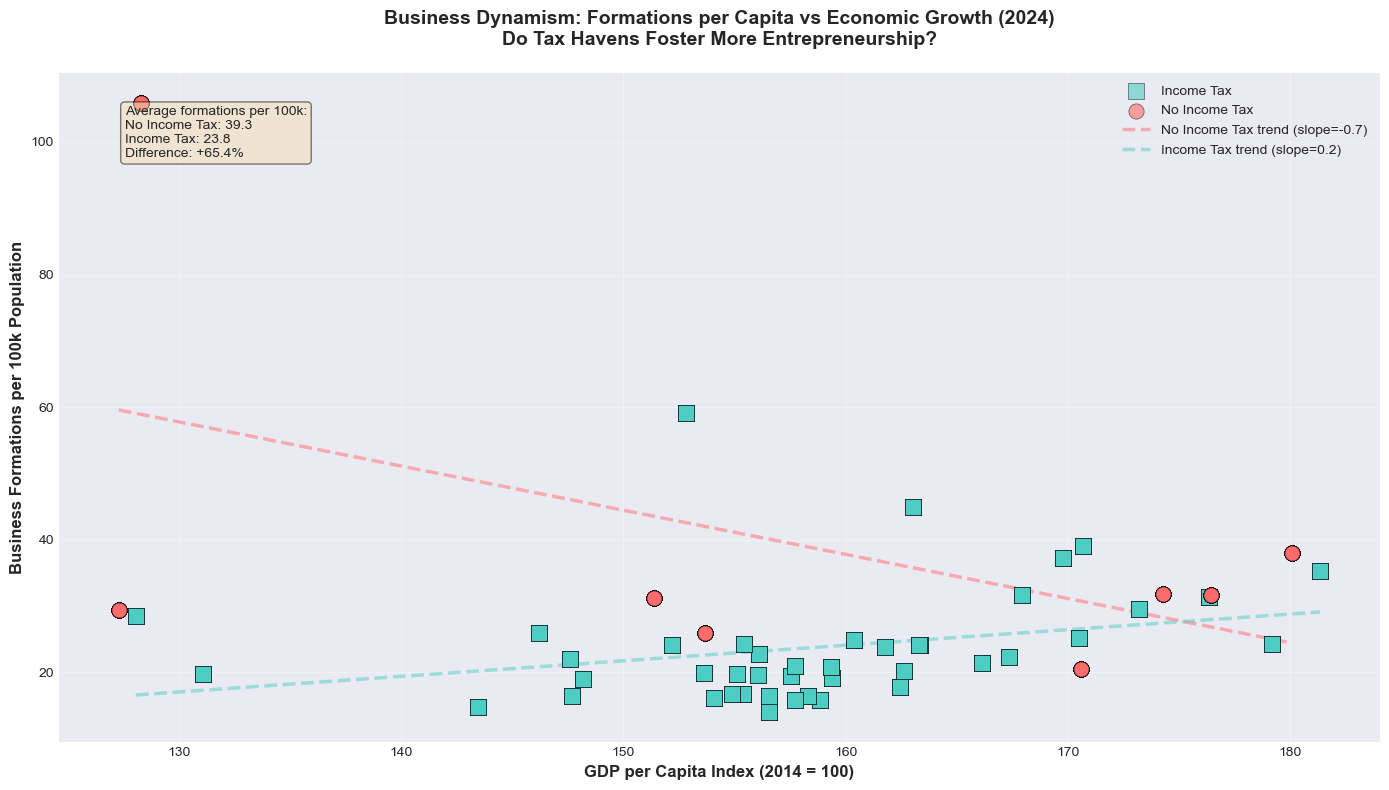

In [ ]:
# Create the scatter plot
fig3, ax3 = plt.subplots(figsize=(14, 8))
year_to_plot = df_annual['Year'].max()
df_plot = df_annual[df_annual['Year'] == year_to_plot].copy()

# Plot Income Tax states FIRST (so they're in the background)
for tax_status, color, marker in [('Income Tax', '#4ECDC4', 's')]:  # Income tax first
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]

    ax3.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Formations_per_100k'],
        label=tax_status,
        alpha=0.6,
        s=120,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=2  # Lower z-order (in back)
    )

# Plot No Income Tax states SECOND (so they're on top)
for tax_status, color, marker in [('No Income Tax', '#FF6B6B', 'o')]:  # No income tax second
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]

    ax3.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Formations_per_100k'],
        label=tax_status,
        alpha=0.6,
        s=120,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=3  # Higher z-order (on top)
    )

# Add trendlines
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    x = df_plot[mask]['GDP_Per_Capita_Indexed'].dropna().values
    y = df_plot[mask]['Formations_per_100k'].dropna().values

    if len(x) > 1:
        # Fit line
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        # Plot trendline
        x_line = np.linspace(x.min(), x.max(), 100)
        ax3.plot(x_line, p(x_line), '--', color=color, alpha=0.5, linewidth=2.5,
                 label=f'{tax_status} trend (slope={z[0]:.1f})',
                 zorder=1)  # Trendlines in the back

ax3.set_xlabel('GDP per Capita Index (2014 = 100)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Business Formations per 100k Population', fontsize=12, fontweight='bold')
ax3.set_title(f'Business Dynamism: Formations per Capita vs Economic Growth ({year_to_plot})\nDo Tax Havens Foster More Entrepreneurship?',
              fontsize=14, fontweight='bold', pad=20)
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3, zorder=0)  # Grid in the very back

# Calculate and display summary statistics
no_tax_mean = df_plot[df_plot['Tax_Status'] == 'No Income Tax']['Formations_per_100k'].mean()
tax_mean = df_plot[df_plot['Tax_Status'] == 'Income Tax']['Formations_per_100k'].mean()
difference_pct = ((no_tax_mean - tax_mean) / tax_mean) * 100

# Add annotation
annotation_text = f'Average formations per 100k:\n'
annotation_text += f'No Income Tax: {no_tax_mean:.1f}\n'
annotation_text += f'Income Tax: {tax_mean:.1f}\n'
annotation_text += f'Difference: {difference_pct:+.1f}%'

ax3.text(0.05, 0.95,
         annotation_text,
         transform=ax3.transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('slide3_business_formations.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def plot_average_comparison(df, metric_name, year_range=(2020, 2025), save_path=None):
    """
    Create a single plot comparing the AVERAGE of tax haven states vs AVERAGE of income tax states
    Uses ALL states (no pairing), quarterly data from 2020-2025

    Parameters:
    -----------
    df : DataFrame
        The main dataframe
    metric_name : str
        Name of the metric to plot (must be in METRICS dictionary)
    year_range : tuple
        (start_year, end_year) - default (2020, 2025)
    save_path : str, optional
        Path to save the figure. If None, uses default naming

    Returns:
    --------
    DataFrame with the averaged metric data
    """
    if metric_name not in METRICS:
        raise ValueError(f"Metric '{metric_name}' not found. Available: {list(METRICS.keys())}")

    metric_config = METRICS[metric_name]

    # States with no income tax as of 2020
    # Source: https://www.investopedia.com/financial-edge/0210/7-states-with-no-income-tax.aspx
    NO_INCOME_TAX_STATES = [
        'Alaska',
        'Florida',
        'Nevada',
        'South Dakota',
        'Tennessee',  # Eliminated income tax fully by 2021, but had no wage tax in 2020
        'Texas',
        'Washington',
        'Wyoming'
    ]
    # Note: New Hampshire only taxes dividends/interest, not wages
    # Tennessee was phasing out and had minimal tax in 2020

    # Filter data
    df_filtered = df[
        (df['Year'] >= year_range[0]) &
        (df['Year'] <= year_range[1]) &
        (df['State'] != 'US Total') &  # Exclude US total
        (df['State'] != 'Puerto Rico') &  # Exclude US total
        (df['State'] != 'District of Columbia')  # Exclude DC
    ].copy()

    # Create tax status
    df_filtered['Tax_Status'] = df_filtered['State'].apply(
        lambda x: 'No Income Tax' if x in NO_INCOME_TAX_STATES else 'Income Tax'
    )

    # Create Year-Quarter column for x-axis
    df_filtered['Year_Quarter'] = df_filtered['Year'].astype(str) + ' Q' + df_filtered['Quarter'].astype(str)
    df_filtered['Year_Quarter_Numeric'] = df_filtered['Year'] + (df_filtered['Quarter'] - 1) / 4

    # Calculate metric if it doesn't exist in the dataframe
    if metric_name not in df_filtered.columns:
        # Add logic here to calculate the metric based on metric_name
        # For example, if it's a per capita metric:
        if 'per_capita' in metric_name.lower():
            base_metric = metric_name.replace('_per_capita', '')
            if base_metric in df_filtered.columns:
                df_filtered[metric_name] = df_filtered[base_metric] / df_filtered['Population']

    # Calculate averages for each group by Year and Quarter
    haven_avg = df_filtered[df_filtered['Tax_Status'] == 'No Income Tax'].groupby(
        ['Year', 'Quarter', 'Year_Quarter', 'Year_Quarter_Numeric']
    )[metric_name].mean().reset_index()
    haven_avg.columns = ['Year', 'Quarter', 'Year_Quarter', 'Year_Quarter_Numeric', 'Average']
    haven_avg['Group'] = 'No Income Tax States (Avg)'

    non_haven_avg = df_filtered[df_filtered['Tax_Status'] == 'Income Tax'].groupby(
        ['Year', 'Quarter', 'Year_Quarter', 'Year_Quarter_Numeric']
    )[metric_name].mean().reset_index()
    non_haven_avg.columns = ['Year', 'Quarter', 'Year_Quarter', 'Year_Quarter_Numeric', 'Average']
    non_haven_avg['Group'] = 'Income Tax States (Avg)'

    # Combine for return
    combined_data = pd.concat([haven_avg, non_haven_avg], ignore_index=True)

    # Create single plot
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    # Plot lines
    ax.plot(haven_avg['Year_Quarter_Numeric'], haven_avg['Average'],
            marker='o', linewidth=2.5, markersize=6,
            label=f'No Income Tax States (n={len(NO_INCOME_TAX_STATES)})\n{", ".join(NO_INCOME_TAX_STATES)}',
            color='#FF6B6B', alpha=0.8)

    # Count income tax states
    income_tax_states = df_filtered[df_filtered['Tax_Status'] == 'Income Tax']['State'].nunique()

    ax.plot(non_haven_avg['Year_Quarter_Numeric'], non_haven_avg['Average'],
            marker='s', linewidth=2.5, markersize=6,
            label=f'Income Tax States (n={income_tax_states})',
            color='#4ECDC4', linestyle='--', alpha=0.8)

    # Formatting
    ax.set_xlabel('Year-Quarter', fontsize=13, fontweight='bold')
    ax.set_ylabel(metric_config['ylabel'], fontsize=13, fontweight='bold')
    ax.set_title(f'{metric_config["title"]}: No Income Tax vs Income Tax States ({year_range[0]}-{year_range[1]})',
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(loc='best', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.ticklabel_format(style='plain', axis='y')

    # Format y-axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(metric_config['format']))

    # Set x-axis to show quarters
    # Create tick positions for each year's Q1
    year_ticks = []
    year_labels = []
    for year in range(year_range[0], year_range[1] + 1):
        year_ticks.append(year)
        year_labels.append(str(year))

    ax.set_xticks(year_ticks)
    ax.set_xticklabels(year_labels, rotation=0)

    # Add minor ticks for quarters
    quarter_ticks = []
    for year in range(year_range[0], year_range[1] + 1):
        for q in range(1, 5):
            quarter_ticks.append(year + (q - 1) / 4)
    ax.set_xticks(quarter_ticks, minor=True)
    ax.grid(True, alpha=0.15, linestyle=':', which='minor')

    plt.tight_layout()

    # Save figure
    if save_path is None:
        save_path = f'/home/{metric_name.lower()}_average_comparison_2020_2025.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Average comparison plot saved as '{save_path}'")
    plt.close()

    # Print summary statistics
    print(f"\n{'='*80}")
    print(f"Summary Statistics for {metric_config['title']}")
    print(f"{'='*80}")
    print(f"\nNo Income Tax States ({len(NO_INCOME_TAX_STATES)} states):")
    print(f"  Average: {haven_avg['Average'].mean():.2f}")
    print(f"  Min: {haven_avg['Average'].min():.2f}")
    print(f"  Max: {haven_avg['Average'].max():.2f}")

    print(f"\nIncome Tax States ({income_tax_states} states):")
    print(f"  Average: {non_haven_avg['Average'].mean():.2f}")
    print(f"  Min: {non_haven_avg['Average'].min():.2f}")
    print(f"  Max: {non_haven_avg['Average'].max():.2f}")

    difference = haven_avg['Average'].mean() - non_haven_avg['Average'].mean()
    pct_difference = (difference / non_haven_avg['Average'].mean()) * 100
    print(f"\nDifference: {difference:.2f} ({pct_difference:+.1f}%)")
    print(f"{'='*80}\n")

    return combined_data

In [ ]:
result = plot_average_comparison(state_merge, 'GDP_Per_Capita', save_path='/Users/apple/gdp_per_capita.png')

✓ Average comparison plot saved as '/Users/apple/gdp_per_capita.png'

Summary Statistics for GDP Per Capita

No Income Tax States (8 states):
  Average: 0.08
  Min: 0.06
  Max: 0.09

Income Tax States (42 states):
  Average: 0.07
  Min: 0.06
  Max: 0.08

Difference: 0.01 (+9.7%)



In [ ]:
result = plot_average_comparison(state_merge, 'Unemployment_Rate', save_path='/Users/apple/unemp.png')

✓ Average comparison plot saved as '/Users/apple/unemp.png'

Summary Statistics for Unemployment Rate

No Income Tax States (8 states):
  Average: 4.73
  Min: 3.47
  Max: 12.68

Income Tax States (43 states):
  Average: 4.38
  Min: 3.10
  Max: 11.66

Difference: 0.34 (+7.8%)



In [ ]:
result = plot_average_comparison(state_merge, 'Formations', save_path='/Users/apple/formations.png')

✓ Average comparison plot saved as '/Users/apple/formations.png'

Summary Statistics for Business Formations

No Income Tax States (8 states):
  Average: 2523.86
  Min: 1710.00
  Max: 2809.00

Income Tax States (43 states):
  Average: 1378.50
  Min: 964.93
  Max: 1488.69

Difference: 1145.35 (+83.1%)



In [ ]:
result = plot_average_comparison(state_merge, 'Total Civilian Labor Force', save_path='/Users/apple/labor.png')

✓ Average comparison plot saved as '/Users/apple/labor.png'

Summary Statistics for Total Civilian Labor Force

No Income Tax States (8 states):
  Average: 4440528.40
  Min: 4049414.75
  Max: 4669501.00

Income Tax States (42 states):
  Average: 3080736.79
  Min: 2944865.17
  Max: 3163683.07

Difference: 1359791.61 (+44.1%)



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/slide3_business_formations_2019_2024.png'

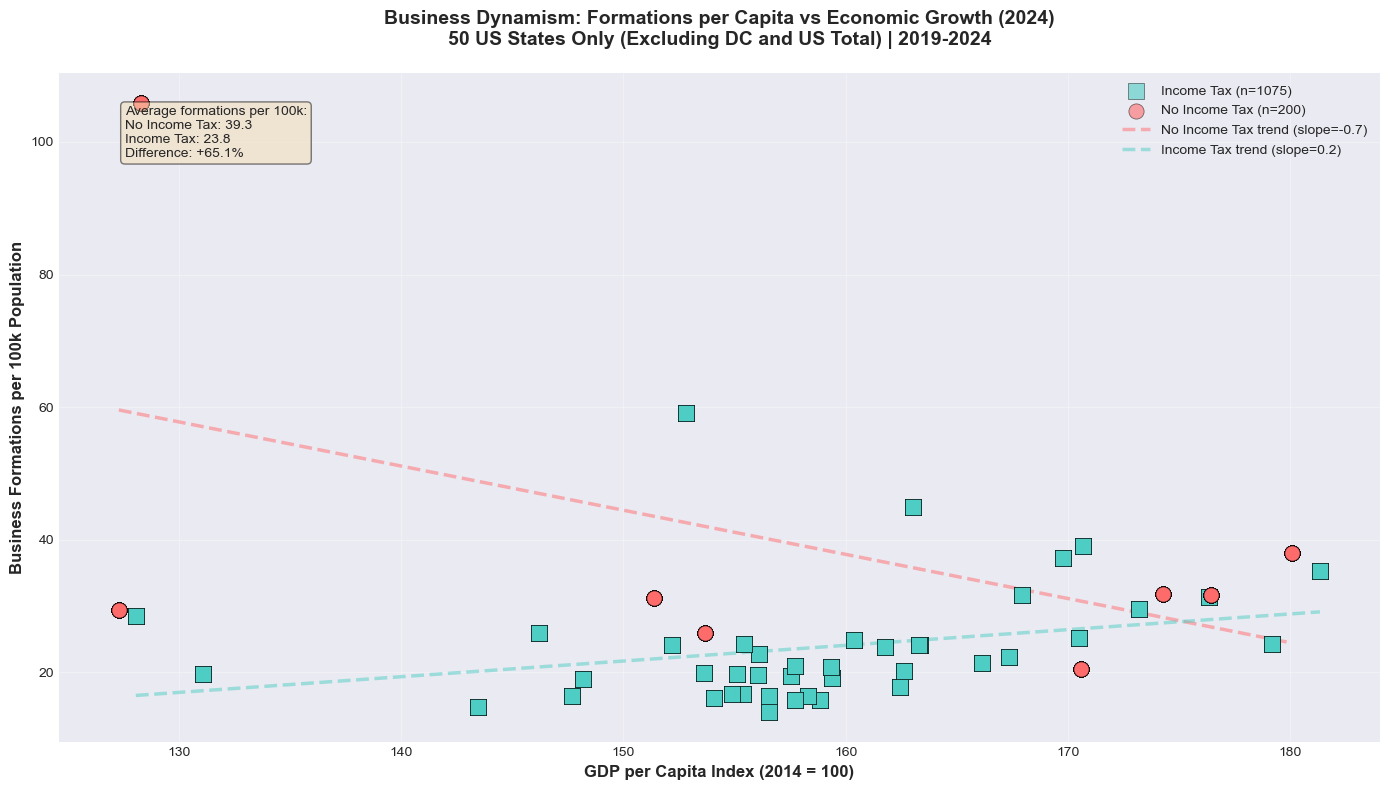

In [ ]:
# Filter data: Remove DC and US totals, limit to 2019-2024
df_filtered = df_annual[
    (df_annual['State'] != 'District of Columbia') &
    (df_annual['State'] != 'United States') &
    (df_annual['Year'] >= 2019) &
    (df_annual['Year'] <= 2024)
].copy()

# Create the scatter plot
fig3, ax3 = plt.subplots(figsize=(14, 8))
year_to_plot = df_filtered['Year'].max()
df_plot = df_filtered[df_filtered['Year'] == year_to_plot].copy()

# Plot Income Tax states FIRST (so they're in the background)
for tax_status, color, marker in [('Income Tax', '#4ECDC4', 's')]:  # Income tax first
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]

    ax3.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Formations_per_100k'],
        label=f'{tax_status} (n={len(data)})',
        alpha=0.6,
        s=120,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=2  # Lower z-order (in back)
    )

# Plot No Income Tax states SECOND (so they're on top)
for tax_status, color, marker in [('No Income Tax', '#FF6B6B', 'o')]:  # No income tax second
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]

    ax3.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Formations_per_100k'],
        label=f'{tax_status} (n={len(data)})',
        alpha=0.6,
        s=120,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=3  # Higher z-order (on top)
    )

# Add trendlines
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    x = df_plot[mask]['GDP_Per_Capita_Indexed'].dropna().values
    y = df_plot[mask]['Formations_per_100k'].dropna().values

    if len(x) > 1:
        # Fit line
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        # Plot trendline
        x_line = np.linspace(x.min(), x.max(), 100)
        ax3.plot(x_line, p(x_line), '--', color=color, alpha=0.5, linewidth=2.5,
                 label=f'{tax_status} trend (slope={z[0]:.1f})',
                 zorder=1)  # Trendlines in the back

ax3.set_xlabel('GDP per Capita Index (2014 = 100)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Business Formations per 100k Population', fontsize=12, fontweight='bold')
ax3.set_title(f'Business Dynamism: Formations per Capita vs Economic Growth ({year_to_plot})\n50 US States Only (Excluding DC and US Total) | 2019-2024',
              fontsize=14, fontweight='bold', pad=20)
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3, zorder=0)  # Grid in the very back

# Calculate and display summary statistics
no_tax_mean = df_plot[df_plot['Tax_Status'] == 'No Income Tax']['Formations_per_100k'].mean()
tax_mean = df_plot[df_plot['Tax_Status'] == 'Income Tax']['Formations_per_100k'].mean()
difference_pct = ((no_tax_mean - tax_mean) / tax_mean) * 100

# Add annotation
annotation_text = f'Average formations per 100k:\n'
annotation_text += f'No Income Tax: {no_tax_mean:.1f}\n'
annotation_text += f'Income Tax: {tax_mean:.1f}\n'
annotation_text += f'Difference: {difference_pct:+.1f}%'

ax3.text(0.05, 0.95,
         annotation_text,
         transform=ax3.transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/slide3_business_formations_2019_2024.png', dpi=300, bbox_inches='tight')
print(f"✓ Graph saved for year {year_to_plot} (filtered to 50 states, 2019-2024)")
plt.show()

# Print summary of what was filtered
print(f"\nData Summary:")
print(f"- Years included: 2019-2024")
print(f"- States with No Income Tax: {df_plot[df_plot['Tax_Status'] == 'No Income Tax']['State'].nunique()}")
print(f"- States with Income Tax: {df_plot[df_plot['Tax_Status'] == 'Income Tax']['State'].nunique()}")
print(f"- Total states: {df_plot['State'].nunique()}")
print(f"- Year plotted: {year_to_plot}")

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   1054 non-null   object 
 1   Year                                    1054 non-null   int64  
 2   Total Population                        1050 non-null   float64
 3   White Alone                             1040 non-null   float64
 4   Black Alone                             1040 non-null   float64
 5   American Indian or Alaskan Native       1040 non-null   float64
 6   Asian Alone                             1040 non-null   float64
 7   Hawaiian or Pacific Islander Alone      1040 non-null   float64
 8   Two or More Races                       1040 non-null   float64
 9   Not Hispanic                            1040 non-null   float64
 10  Hispanic                                1040 non-null   floa

KeyError: 'GDP_Per_Capita_Indexed'

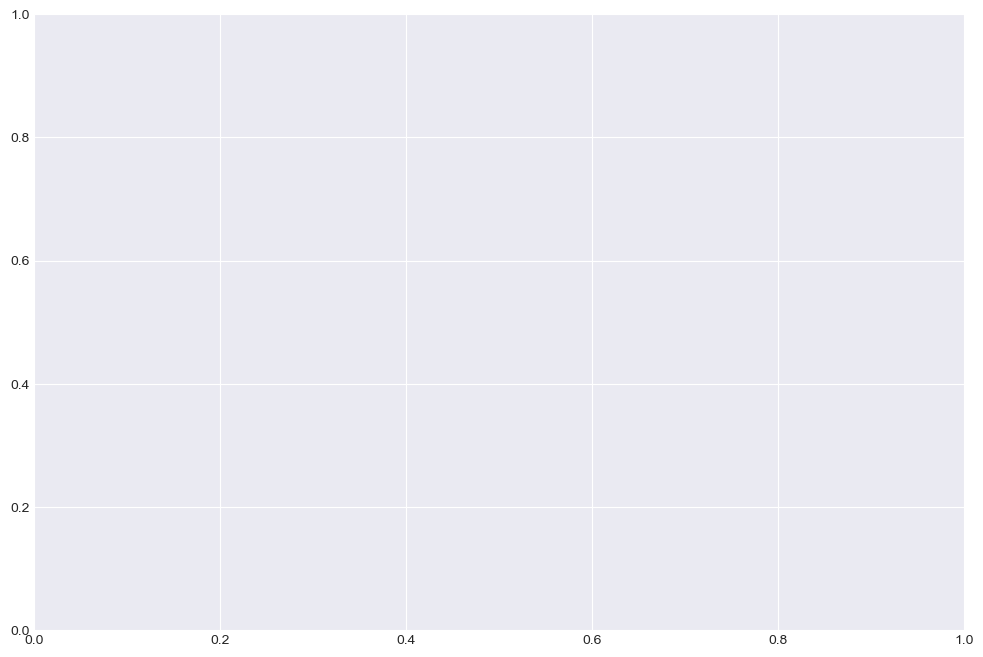

In [ ]:
# Filter data: Remove US Total, DC, Puerto Rico, and limit to 2019-2024
df_filtered = state_merge[
    (state_merge['State'] != 'United States') &
    (state_merge['State'] != 'District of Columbia') &
    (state_merge['State'] != 'Puerto Rico') &
    (state_merge['Year'] >= 2019) &
    (state_merge['Year'] <= 2024)
].copy()

# Get the most recent year for scatter plots
year_to_plot = df_filtered['Year'].max()
df_plot = df_filtered[df_filtered['Year'] == year_to_plot].copy()

# SLIDE 2: GDP per Capita vs HPI (Indexed)
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Plot Income Tax states FIRST (background)
for tax_status, color, marker in [('Income Tax', '#4ECDC4', 's')]:
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]
    ax2.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Housing_Price_Index_Indexed'],
        label=f'{tax_status} (n={len(data)})',
        alpha=0.6,
        s=100,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=2
    )

# Plot No Income Tax states SECOND (foreground)
for tax_status, color, marker in [('No Income Tax', '#FF6B6B', 'o')]:
    mask = df_plot['Tax_Status'] == tax_status
    data = df_plot[mask]
    ax2.scatter(
        data['GDP_Per_Capita_Indexed'],
        data['Housing_Price_Index_Indexed'],
        label=f'{tax_status} (n={len(data)})',
        alpha=0.6,
        s=100,
        color=color,
        edgecolors='black',
        linewidth=0.5,
        marker=marker,
        zorder=3
    )

ax2.set_xlabel('GDP per Capita Index (2014 = 100)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Housing Price Index (2014 = 100)', fontsize=12, fontweight='bold')
ax2.set_title(f'GDP per Capita vs Housing Prices by State ({year_to_plot})\n50 US States Only | 2019-2024 | Indexed to 2014 = 100',
              fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3, zorder=0)

# Add trendlines
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    x = df_plot[mask]['GDP_Per_Capita_Indexed'].dropna().values
    y = df_plot[mask]['Housing_Price_Index_Indexed'].dropna().values

    if len(x) > 1:
        # Fit line
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        # Plot trendline
        x_line = np.linspace(x.min(), x.max(), 100)
        ax2.plot(x_line, p(x_line), '--', color=color, alpha=0.5, linewidth=2,
                 label=f'{tax_status} trend (slope={z[0]:.2f})',
                 zorder=1)

ax2.legend(loc='upper left', fontsize=10)

# Add annotation about the tradeoff
ax2.text(0.95, 0.05,
         'Tradeoff visualization:\nHigher GDP per capita often correlates with higher housing prices',
         transform=ax2.transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/slide2_gdp_per_capita_vs_hpi_2019_2024.png', dpi=300, bbox_inches='tight')
print(f"✓ Slide 2 saved: GDP per Capita vs HPI ({year_to_plot})")
plt.show()

Data filtered: 30,600 records
Years: 2019-2024
States included: 51
Excluded: US Total, District of Columbia, Puerto Rico

States with no income tax:
['Alaska' 'Florida' 'Nevada' 'South Dakota' 'Tennessee' 'Texas'
 'Washington' 'Wyoming']

Number of no-income-tax states: 8
Number of income-tax states: 43
Total states: 51



/var/folders/4j/zbynf7z51vjd7srq3yt48vpm0000gn/T/ipykernel_846/3427349343.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_indexed = df_filtered.groupby('State', group_keys=False).apply(


LinAlgError: SVD did not converge in Linear Least Squares

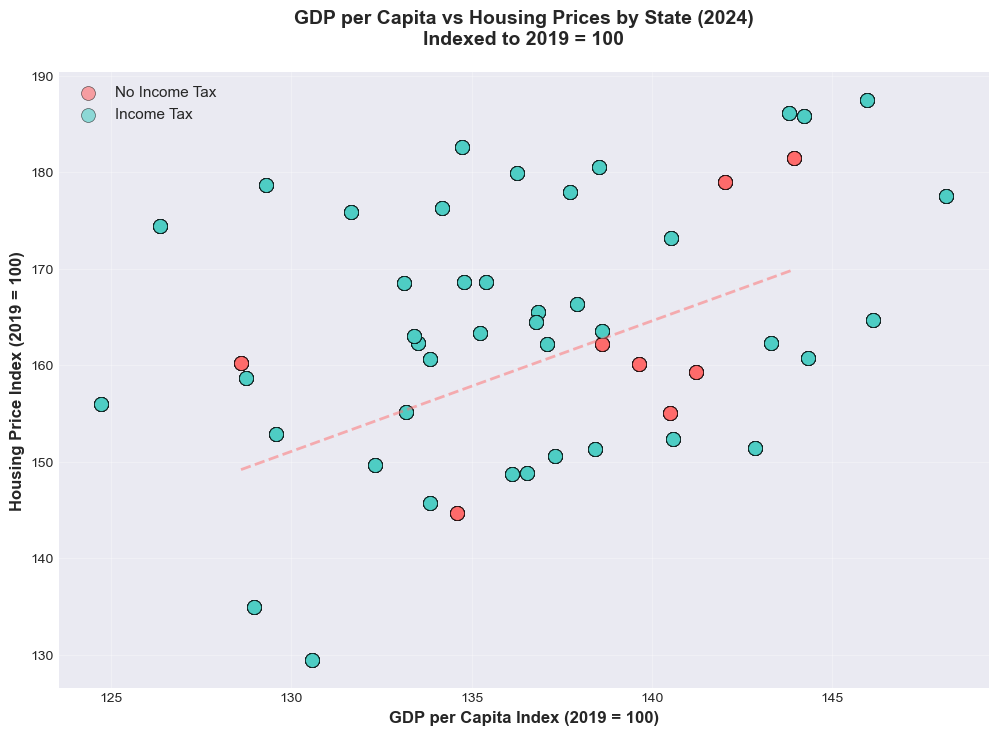

In [ ]:
# Step 0: Filter data - Remove US Total, United States, DC, and limit to 2019-2024
df_filtered = state_merge[
    (state_merge['State'] != 'United States') &
    (state_merge['State'] != 'District of Columbia') &
    (state_merge['State'] != 'Puerto Rico') &  # Added for good measure
    (state_merge['Year'] >= 2019) &
    (state_merge['Year'] <= 2024)
].copy()

print(f"Data filtered: {len(df_filtered):,} records")
print(f"Years: 2019-2024")
print(f"States included: {df_filtered['State'].nunique()}")
print(f"Excluded: US Total, District of Columbia, Puerto Rico\n")

# Step 1: Normalize everything to 2019 = 100
def index_to_base_year(group, columns, base_year=2019):
    """
    Index values to base_year = 100 for each state
    """
    # Check if base year exists for this state
    if base_year not in group['Year'].values:
        print(f"Warning: Base year {base_year} not found for state {group['State'].iloc[0]}")
        return group

    # Get base year values
    base_values = group[group['Year'] == base_year][columns].iloc[0]

    # Index all values
    for col in columns:
        group[f'{col}_Indexed'] = (group[col] / base_values[col]) * 100

    return group

# Columns to index
columns_to_index = ['GDP_Total', 'Population', 'GDP_Per_Capita', 'Housing_Price_Index']

# Apply indexing by state
df_indexed = df_filtered.groupby('State', group_keys=False).apply(
    lambda x: index_to_base_year(x, columns_to_index, base_year=2019)
)

# Filter to annual data (Q4 only for cleaner visualization)
df_annual = df_indexed[df_indexed['Quarter'] == 4].copy()

# Calculate year-over-year changes
df_annual = df_annual.sort_values(['State', 'Year'])
for col in columns_to_index:
    indexed_col = f'{col}_Indexed'
    df_annual[f'{col}_Change'] = df_annual.groupby('State')[indexed_col].diff()

print("="*80)
print("States with no income tax:")
print(df_annual[df_annual['Tax_Status'] == 'No Income Tax']['State'].unique())
print(f"\nNumber of no-income-tax states: {df_annual[df_annual['Tax_Status'] == 'No Income Tax']['State'].nunique()}")
print(f"Number of income-tax states: {df_annual[df_annual['Tax_Status'] == 'Income Tax']['State'].nunique()}")
print(f"Total states: {df_annual['State'].nunique()}")
print("="*80 + "\n")

# SLIDE 2: GDP per Capita vs HPI (Indexed)
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Create scatter plot
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    ax2.scatter(
        df_plot[mask]['GDP_Per_Capita_Indexed'],
        df_plot[mask]['Housing_Price_Index_Indexed'],
        label=tax_status,
        alpha=0.6,
        s=100,
        color=color,
        edgecolors='black',
        linewidth=0.5
    )

ax2.set_xlabel('GDP per Capita Index (2019 = 100)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Housing Price Index (2019 = 100)', fontsize=12, fontweight='bold')
ax2.set_title(f'GDP per Capita vs Housing Prices by State ({year_to_plot})\nIndexed to 2019 = 100',
              fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add trendlines
for tax_status, color in [('No Income Tax', '#FF6B6B'), ('Income Tax', '#4ECDC4')]:
    mask = df_plot['Tax_Status'] == tax_status
    x = df_plot[mask]['GDP_Per_Capita_Indexed'].values
    y = df_plot[mask]['Housing_Price_Index_Indexed'].values

    # Fit line
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Plot trendline
    x_line = np.linspace(x.min(), x.max(), 100)
    ax2.plot(x_line, p(x_line), '--', color=color, alpha=0.5, linewidth=2,
             label=f'{tax_status} trend')

ax2.legend(loc='upper left', fontsize=10)

# Add annotation about the tradeoff
ax2.text(0.95, 0.05,
         'Tradeoff visualization:\nHigher GDP per capita often correlates with higher housing prices',
         transform=ax2.transAxes,
         fontsize=9,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('slide2_gdp_per_capita_vs_hpi.png', dpi=300, bbox_inches='tight')
plt.show()

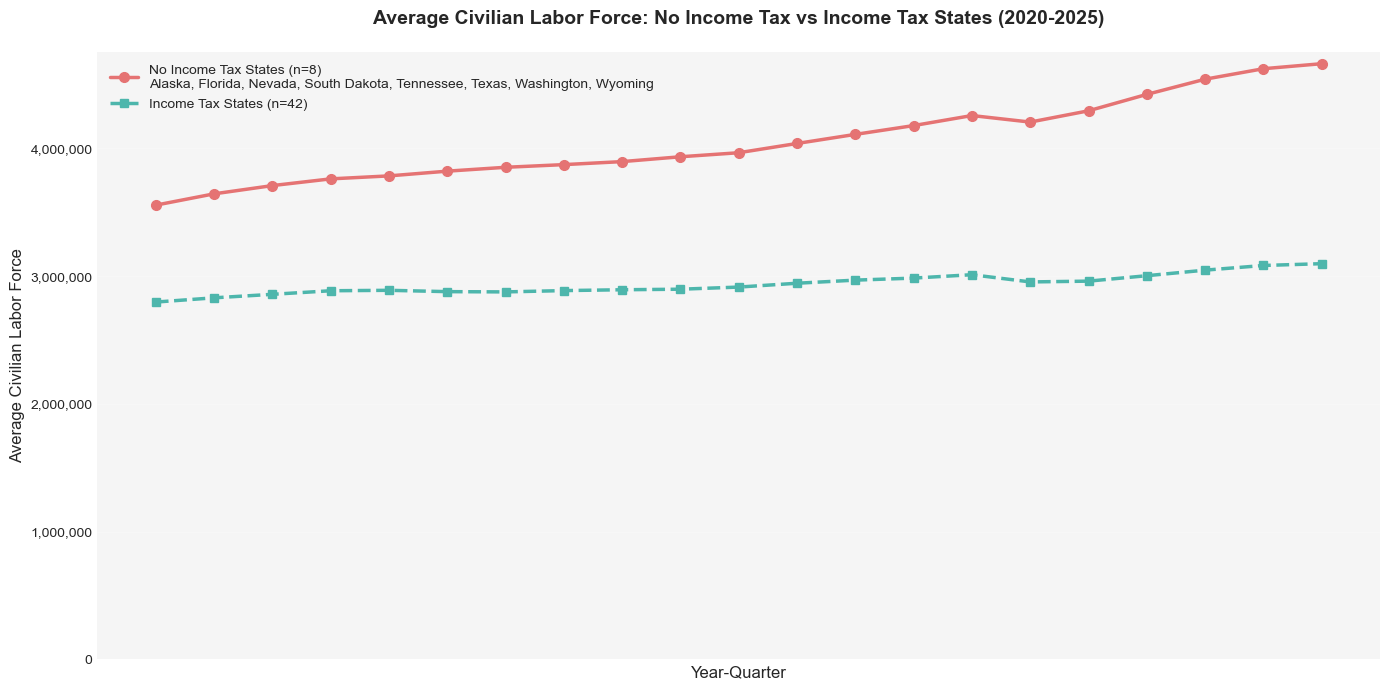

In [ ]:
# Assuming your dataframe is called 'df'
# Define the no income tax states
no_income_tax_states = ['Alaska', 'Florida', 'Nevada', 'South Dakota',
                        'Tennessee', 'Texas', 'Washington', 'Wyoming']

# Create a flag for no income tax states
state_merge['No_Income_Tax'] = state_merge['State'].isin(no_income_tax_states)

# Create Year-Quarter column for grouping
state_merge['Year_Quarter'] = state_merge['Year'].astype(str) + '-Q' + state_merge['Quarter'].astype(str)

# Group by Year-Quarter and tax status, calculate average
grouped = state_merge.groupby(['Year', 'No_Income_Tax'])['Total Civilian Labor Force'].mean().reset_index()
grouped['Year_Quarter'] = grouped['Year'].astype(str)

# Sort by Year and Quarter
grouped = grouped.sort_values(['Year'])

# Separate data for the two groups
no_tax = grouped[grouped['No_Income_Tax'] == True].reset_index(drop=True)
income_tax = grouped[grouped['No_Income_Tax'] == False].reset_index(drop=True)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot lines
plt.plot(no_tax.index, no_tax['Total Civilian Labor Force'],
         marker='o', linewidth=2.5, markersize=7,
         color='#E57373', label='No Income Tax States (n=8)\nAlaska, Florida, Nevada, South Dakota, Tennessee, Texas, Washington, Wyoming')

plt.plot(income_tax.index, income_tax['Total Civilian Labor Force'],
         marker='s', linewidth=2.5, markersize=6, linestyle='--',
         color='#4DB6AC', label='Income Tax States (n=42)')

# Customize plot
plt.title('Average Civilian Labor Force: No Income Tax vs Income Tax States (2020-2025)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Average Civilian Labor Force', fontsize=12)

# Set y-axis to start from 0
plt.ylim(0, None)

# Set x-axis labels (show only years)
x_ticks = []
x_labels = []
for i in range(len(no_tax)):
    year = no_tax.iloc[i]['Year']

plt.xticks(x_ticks, x_labels)

# Add grid
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F5F5F5')

# Format y-axis with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add legend
plt.legend(loc='upper left', fontsize=10, framealpha=0.95)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
plt.savefig('labor_force_comparison.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

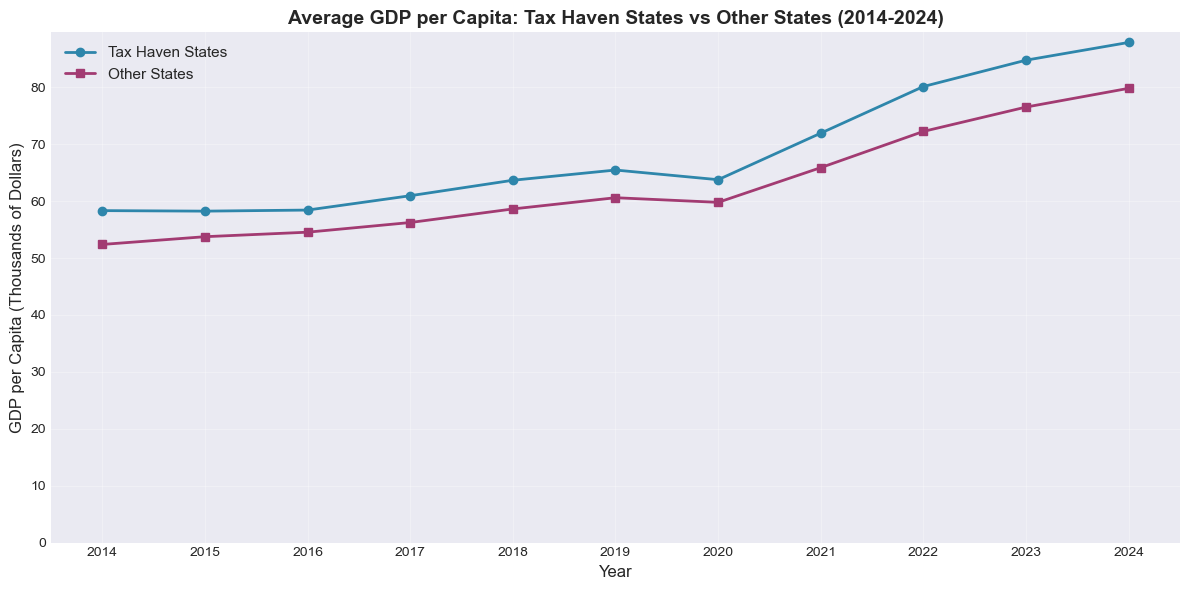


Average GDP per Capita (in thousands of dollars):

Tax Haven States:
    Year  GDP_per_capita
1   2014       58.345031
3   2015       58.254349
5   2016       58.442676
7   2017       60.964048
9   2018       63.683499
11  2019       65.478164
13  2020       63.780344
15  2021       71.959761
17  2022       80.155440
19  2023       84.788683
21  2024       87.905918

Other States:
    Year  GDP_per_capita
0   2014       52.399996
2   2015       53.762116
4   2016       54.554874
6   2017       56.254815
8   2018       58.640285
10  2019       60.614132
12  2020       59.799746
14  2021       65.900360
16  2022       72.266386
18  2023       76.546294
20  2024       79.840749


In [ ]:
# Define tax haven states
tax_havens = ['Alaska', 'Florida', 'Nevada', 'South Dakota', 'Tennessee', 'Texas', 'Washington', 'Wyoming']

# States to exclude
exclude_states = ['District of Columbia', 'Puerto Rico', 'United States', 'US Total']

# Filter data for years 2014-2024
df_filtered = state_merge[(state_merge['Year'] >= 2014) & (state_merge['Year'] <= 2024)].copy()

# Exclude specified states
df_filtered = df_filtered[~df_filtered['State'].isin(exclude_states)]

# Calculate GDP per capita (GDP_Total is in millions, Population is in actual count)
# Convert from millions to thousands: (GDP_Total * 1000) / Population
df_filtered['GDP_per_capita'] = (df_filtered['GDP_Total'] * 1000) / df_filtered['Population']

# Create tax haven indicator
df_filtered['Is_Tax_Haven'] = df_filtered['State'].isin(tax_havens)

# Group by Year and tax haven status, calculate mean GDP per capita
grouped = df_filtered.groupby(['Year', 'Is_Tax_Haven'])['GDP_per_capita'].mean().reset_index()

# Separate tax havens and other states
tax_haven_data = grouped[grouped['Is_Tax_Haven'] == True]
other_states_data = grouped[grouped['Is_Tax_Haven'] == False]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tax_haven_data['Year'], tax_haven_data['GDP_per_capita'],
         marker='o', linewidth=2, label='Tax Haven States', color='#2E86AB')
plt.plot(other_states_data['Year'], other_states_data['GDP_per_capita'],
         marker='s', linewidth=2, label='Other States', color='#A23B72')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (Thousands of Dollars)', fontsize=12)
plt.title('Average GDP per Capita: Tax Haven States vs Other States (2014-2024)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(2014, 2025))
plt.ylim(bottom=0)  # Set y-axis to start from 0
plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("\nAverage GDP per Capita (in thousands of dollars):")
print("\nTax Haven States:")
print(tax_haven_data[['Year', 'GDP_per_capita']])
print("\nOther States:")
print(other_states_data[['Year', 'GDP_per_capita']])

In [2]:
# Load the tax dataset
# Ensure the path matches the file location in your Colab environment
df = pd.read_csv("/content/1. DatathonMasterStateTaxData.csv")

# 1. Filter for the specified timeframe: 2020 through Q2 2025
df = df[df['Year'] >= 2020]
df = df[~((df['Year'] == 2025) & (df['Quarter'] > 2))]

# EXCLUDE National aggregates AND District of Columbia
# This ensures only the 50 actual states are used in the comparison
df = df[~df['State'].isin(['US Total', 'District of Columbia'])]

# 2. Categorize the states into your two custom groups
tax_haven_list = ['Alaska', 'Florida', 'Nevada', 'Texas', 'Wyoming', 'South Dakota', 'Tennessee', 'Washington ']
df['Group'] = df['State'].apply(lambda x: 'Tax Haven States' if x in tax_haven_list else 'Other States')

# 3. Identify and sum specific tax amounts per row for easier aggregation
# General Sales = T09
df['Sales_Amt'] = df.apply(lambda x: x['Amount'] if x['Tax_Code'] == 'T09' else 0, axis=1)

# Excise Tax = T10 through T19
excise_codes = ['T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T19', 'T59']
df['Excise_Amt'] = df.apply(lambda x: x['Amount'] if x['Tax_Code'] in excise_codes else 0, axis=1)

# 4. Aggregate the totals by the defined groups
grouped = df.groupby('Group').agg({
    'Amount': 'sum',      # This is the "Total"
    'Sales_Amt': 'sum',
    'Excise_Amt': 'sum'
}).rename(columns={'Amount': 'Total_Revenue'})

# 5. Calculate the "Other Tax" amount and the resulting percentages
# Other Tax = Total - (Sales + Excise)
grouped['Other_Tax_Amt'] = grouped['Total_Revenue'] - (grouped['Sales_Amt'] + grouped['Excise_Amt'])

# Convert to percentages for the final table
grouped['General Sales %'] = (grouped['Sales_Amt'] / grouped['Total_Revenue'] * 100).round(1).astype(str) + '%'
grouped['Excise Tax %'] = (grouped['Excise_Amt'] / grouped['Total_Revenue'] * 100).round(1).astype(str) + '%'
grouped['Other Tax %'] = (grouped['Other_Tax_Amt'] / grouped['Total_Revenue'] * 100).round(1).astype(str) + '%'
grouped['Total %'] = '100%'

# 6. Final Formatting to replicate the table structure in the screenshot
final_table = grouped[['Total %', 'General Sales %', 'Excise Tax %', 'Other Tax %']].T
print("Type of Tax Revenue (2020 - 2025 Q2)")
print(final_table)

Type of Tax Revenue (2020 - 2025 Q2)
Group           Other States Tax Haven States
Total %                 100%             100%
General Sales %        26.3%            60.2%
Excise Tax %           13.2%            20.0%
Other Tax %            60.5%            19.8%


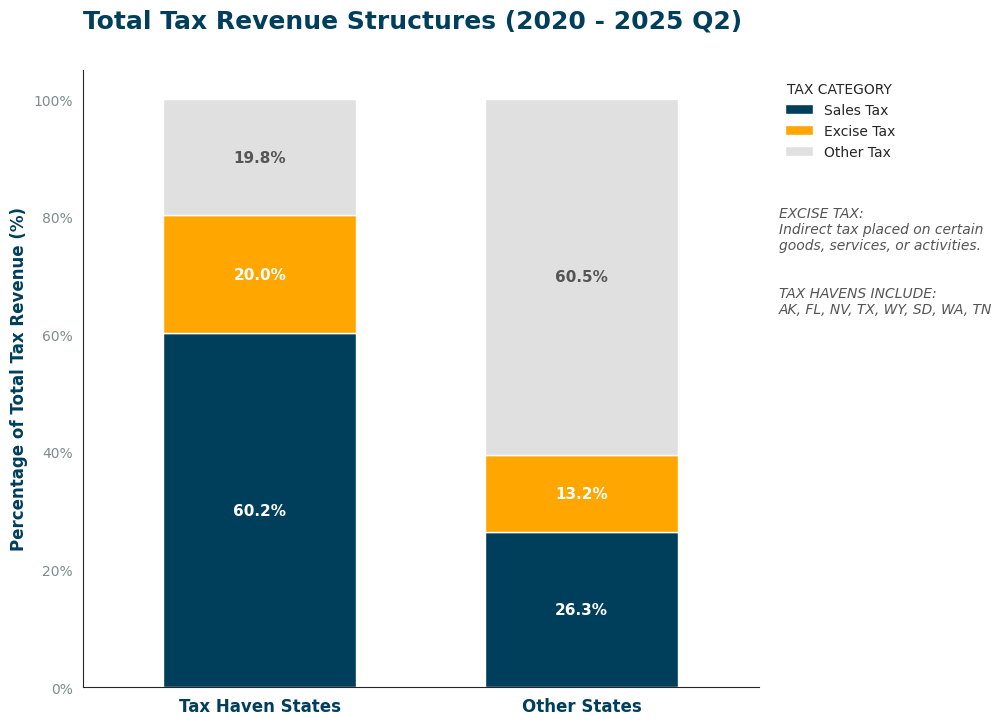

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare numerical data for plotting
# Using 'Total_Revenue', 'Sales_Amt', and 'Excise_Amt' from your established 'grouped' variable
plot_data = grouped.copy()
plot_data['Sales Tax'] = (plot_data['Sales_Amt'] / plot_data['Total_Revenue']) * 100
plot_data['Excise Tax'] = (plot_data['Excise_Amt'] / plot_data['Total_Revenue']) * 100
plot_data['Other Tax'] = (plot_data['Other_Tax_Amt'] / plot_data['Total_Revenue']) * 100

# SWAP ORDER: Place Tax Haven States on the left
plot_data = plot_data.reindex(['Tax Haven States', 'Other States'])

# Set clean aesthetic style
sns.set_style("white")
plt.rcParams['font.family'] = 'sans-serif'

# 2. Define your specific corporate highlight palette
colors = ['#003f5c', '#ffa600', '#e0e0e0']

# 3. Create the Visualization
ax = plot_data[['Sales Tax', 'Excise Tax', 'Other Tax']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=colors,
    edgecolor='white',
    width=0.6
)

# 4. Refine Formatting (Y-axis numbers are kept as requested)
plt.title('Total Tax Revenue Structures (2020 - 2025 Q2)',
          fontsize=18, fontweight='bold', pad=30, loc='left', color='#003f5c')

plt.ylabel('Percentage of Total Tax Revenue (%)', fontsize=12, fontweight='bold', color='#003f5c')
plt.yticks(range(0, 101, 20), [f'{i}%' for i in range(0, 101, 20)], fontsize=10, color='#7f8c8d')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=12, fontweight='bold', color='#003f5c')

# Remove top and right spines for a modern dashboard look
sns.despine(top=True, right=True, left=False, bottom=False)

# 5. Add Data Labels with Legibility Logic
n_groups = len(plot_data)
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:
        # White text for dark blue/gold segments, and dark gray for the light gray segment
        label_color = 'white' if i < (n_groups * 2) else '#555555'
        ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                ha='center', va='center', color=label_color,
                fontweight='bold', fontsize=11)

# 6. Custom Legend and requested sub-notes
# Create the legend first
leg = plt.legend(title='TAX CATEGORY', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Place the required explanations directly under the legend box
plt.text(1.03, 0.78, "EXCISE TAX:\nIndirect tax placed on certain\ngoods, services, or activities.",
         transform=ax.transAxes, fontsize=10, color='#555555', style='italic', va='top')

plt.text(1.03, 0.65, "TAX HAVENS INCLUDE:\nAK, FL, NV, TX, WY, SD, WA, TN",
         transform=ax.transAxes, fontsize=10, color='#555555', style='italic', va='top')

plt.tight_layout(rect=[0, 0.03, 0.85, 0.95]) # Adjust layout to ensure side text is visible
plt.show()